In [2]:
python -m venv venv
source venv/bin/activate   # Mac/Linux

SyntaxError: invalid syntax (1127524583.py, line 1)

In [1]:
pip install pandas numpy yfinance scikit-learn matplotlib


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 44.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 28.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
plt.rcParams["figure.figsize"] = (12,5)

Matplotlib is building the font cache; this may take a moment.


In [3]:
tickers = [
"AAPL","MSFT","AMZN","NVDA","GOOGL","GOOG","META","BRK.B","LLY","TSLA","JPM","UNH","JNJ","V","PG","XOM","MA","HD","AVGO","MRK",
"CVX","COST","ABBV","PEP","WMT","KO","BAC","PFE","ADBE","ASML","TMO","CSCO","CRM","NFLX","ABT","LIN","MCD","ACN","AMD","DHR",
"DIS","INTC","VZ","NKE","NEE","WFC","TXN","HON","BMY","AMGN","PM","QCOM","IBM","RTX","CAT","SCHW","GS","SPGI","PLD","LOW","MDT",
"AXP","NOW","UNP","ISRG","INTU","BKNG","SYK","AMT","LMT","T","GE","MO","ADI","C","ZTS","MDLZ","ELV","MS","DE","VRTX","CVS",
"REGN","ADP","BLK","CI","MMC","CME","TJX","PYPL","PGR","PNC","GILD","BDX","SO","MU","DUK","ICE","CSX","GM","SHW","FCX","APD",
"CL","EQIX","EW","EOG","ITW","NOC","FIS","ETN","AON","COP","FDX","HCA","CMG","ORLY","KDP","PSX","EMR","MPC","NSC","TGT","LRCX",
"MAR","DD","KMB","ADM","KMI","MSCI","AEP","AIG","LULU","GIS","ROP","BK","HUM","ADSK","OXY","MCK","EXC","WMB","CTAS","AFL","PXD",
"HPQ","CTVA","CNC","ALL","COF","MNST","SRE","WELL","F","PRU","STZ","VLO","YUM","A","HES","AMP","CB","PAYX","PH","SLB","ECL","PSA",
"O","CARR","MTD","D","JCI","TRV","SPG","ODFL","WEC","DOW","PEG","LHX","RSG","ED","HAL","AEE","XEL","NEM","DVN","VICI","ROST",
"VRSK","KR","AAL","DAL","UAL","RCL","NUE","NDAQ","ZBRA","HPE","KEYS","MOS","FTNT","HLT","TT","WBD","HIG","LYB","MKC","BLL","NTRS",
"GLW","CMS","SWK","CPB","CHTR","BBY","CE","HSY","CLX","NVR","WHR","SYY","LEN","DHI","PHM","MTB","CFG","RF","FITB","HBAN","KEY",
"CMA","ALLY","UHS","DG","DLTR","ROK","ANET","IDXX","ILMN","ALGN","BIO","GEN","HOLX","INCY","ZBH","STE","WAT","PKI","CRL","TDY",
"TER","KLAC","CDNS","SNPS","ANSS","WDAY","DDOG","NET","OKTA","ZS","MDB","PANW","CHKP","CSGP","VRSN","EBAY","DXC","HP","FISV",
"FLT","ORCL","SAP","TEAM","UBER","LYFT","DASH","RIVN","LCID","NKLA","FSLR","ENPH","SEDG","RUN","PLUG","BE","BLDP","SHOP","SQ",
"COIN","HOOD","SNAP","PINS","ZM","SPOT","DOCU","PATH","AI","OPEN","RBLX","TTD","TWLO","U","SPLK","SNOW","ESTC","EL","HOG","PNR",
"TSCO","CTSH","HWM","CNP","OKE","APA","VMC","MLM","WY","CF","CAG","HRL","SJM","TAP","BTI","CMCSA","LYV","ROKU","TTWO","EA","MTCH",
"EXPE","SBUX","DPZ","DRI","MGM","CZR","LVS","WYNN","H","NCLH","CCL","BA","SPR","TXT","GD","HII","TDG","HEI","MMM","AME","IR","DOV",
"LECO","XYL","FAST","WSO","GWW","URI","PCAR","CMI","STLA","HMC","TM","NSANY","VWAGY","MBGYY","BMWYY","FCAU"
]
tickers = [t.replace('.', '-') for t in tickers]
print(f"Using {len(tickers)} tickers")


Using 367 tickers


In [4]:
import time

raw = yf.download(
    tickers, period="10y", auto_adjust=True, group_by="ticker",
    threads=False, progress=False
)

panels, failed = [], []

def _extract_sub(df, t):
    try:
        sub = df[t]
    except KeyError:
        try:
            sub = df.xs(t, axis=1, level=1)
        except Exception:
            return None
    if sub is None or "Close" not in sub.columns or sub["Close"].dropna().empty:
        return None
    sub = sub[["Close","High","Low","Volume"]].copy()
    sub["Ticker"] = t
    return sub

for t in tickers:
    sub = _extract_sub(raw, t)
    (panels if sub is not None else failed).append(sub if sub is not None else t)

# Retry failures with 5y window
retry_ok, retry_fail = [], []
for t in failed:
    try:
        s = yf.download(t, period="5y", auto_adjust=True, progress=False, threads=False)
        if "Close" in s.columns and not s["Close"].dropna().empty:
            s = s[["Close","High","Low","Volume"]].copy()
            s["Ticker"] = t
            panels.append(s); retry_ok.append(t)
        else:
            retry_fail.append(t)
    except Exception:
        retry_fail.append(t)
    time.sleep(0.05)

if not panels:
    raise RuntimeError("No tickers downloaded successfully.")

px = pd.concat(panels)
px.index.names = ["Date"]
px = px.reset_index().set_index(["Date","Ticker"]).sort_index()

print(f"Downloaded {px.reset_index()['Ticker'].nunique()} tickers successfully. Missing: {len(retry_fail)}")
if retry_fail:
    print("Still missing:", retry_fail[:25], "..." if len(retry_fail)>25 else "")

# SPY benchmark
spy = yf.download("SPY", period="10y", auto_adjust=True, progress=False, threads=False)[["Close"]]\
        .rename(columns={"Close":"SPY_Close"}).dropna()


10 Failed downloads:
['BLL', 'PKI', 'NKLA', 'SQ', 'SPLK', 'BMWYY', 'PXD', 'FLT', 'FCAU', 'FISV']: YFPricesMissingError('possibly delisted; no price data found  (period=10y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['PXD']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['BLL']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['PKI']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['FISV']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['FLT']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No d

Downloaded 357 tickers successfully. Missing: 10
Still missing: ['PXD', 'BLL', 'PKI', 'FISV', 'FLT', 'NKLA', 'SQ', 'SPLK', 'BMWYY', 'FCAU'] 


In [5]:
# Build flat frame
px_flat = px.reset_index() if isinstance(px.index, pd.MultiIndex) else px.copy()
if "Date" not in px_flat.columns: px_flat = px_flat.reset_index().rename(columns={"index":"Date"})
px_flat["Date"] = pd.to_datetime(px_flat["Date"]).dt.tz_localize(None)
px_flat = px_flat.sort_values(["Ticker","Date"]).reset_index(drop=True)

# Core features
g = px_flat.groupby("Ticker", sort=False)
px_flat["ret_1d"] = g["Close"].pct_change()
for w in [21,63,126,252]:
    px_flat[f"ret_{w}d"] = g["Close"].pct_change(w)
px_flat["vol_21d"] = g["ret_1d"].transform(lambda s: s.rolling(21).std())
px_flat["vol_63d"] = g["ret_1d"].transform(lambda s: s.rolling(63).std())
for w in [50,200]:
    ma = g["Close"].transform(lambda s: s.rolling(w).mean())
    px_flat[f"dist_sma_{w}"] = px_flat["Close"]/(ma + 1e-12) - 1
px_flat["prev_close"] = g["Close"].shift(1)
hl = (px_flat["High"]-px_flat["Low"]).abs()
hc = (px_flat["High"]-px_flat["prev_close"]).abs()
lc = (px_flat["Low"] -px_flat["prev_close"]).abs()
px_flat["tr"] = np.maximum.reduce([hl,hc,lc])
px_flat["atr_14"] = g["tr"].transform(lambda s: s.rolling(14).mean())
px_flat.drop(columns=["prev_close","tr"], inplace=True)

# SPY via merge_asof (time-aware)
spy_clean = spy.copy()
spy_clean.index = pd.to_datetime(spy_clean.index).tz_localize(None)
spy_df = spy_clean.asfreq("B").ffill().reset_index()
spy_df.columns = ["Date","SPY_Close"]
spy_df = spy_df.sort_values("Date")
px_flat = pd.merge_asof(px_flat.sort_values("Date"), spy_df, on="Date", direction="backward", allow_exact_matches=True)
px_flat["rel_px"] = px_flat["Close"]/px_flat["SPY_Close"]
px_flat["rel_mom_63d"] = px_flat.groupby("Ticker", group_keys=False)["rel_px"].pct_change(63, fill_method=None)

# Labels (6-month horizon) and monthly sampling
H = 126
px_flat["fwd_ret_H"] = px_flat.groupby("Ticker", sort=False)["Close"].shift(-H)/px_flat["Close"] - 1
px_flat["Month"] = px_flat["Date"].values.astype("datetime64[M]")
m_end = px_flat.sort_values(["Ticker","Date"]).groupby(["Month","Ticker"], sort=False).tail(1)

feature_cols = [
    "ret_21d","ret_63d","ret_126d","ret_252d",
    "vol_21d","vol_63d","dist_sma_50","dist_sma_200",
    "atr_14","rel_mom_63d"
]
dataset = m_end.dropna(subset=feature_cols + ["fwd_ret_H"]).copy()
label_thresh = dataset.groupby("Month")["fwd_ret_H"].transform(lambda s: s.quantile(0.90))
dataset["label_top_decile"] = (dataset["fwd_ret_H"] >= label_thresh).astype(int)

# (Optional) restore MultiIndex px for consistency
px = px_flat.set_index(["Date","Ticker"]).sort_index()

print("Rows in dataset:", len(dataset))
print("Unique tickers:", dataset["Ticker"].nunique())
print("SPY_Close nulls after merge_asof:", int(px_flat["SPY_Close"].isna().sum()))
print("px index names:", px.index.names)


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/4203983912.py:9: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  px_flat["ret_1d"] = g["Close"].pct_change()
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/4203983912.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  px_flat[f"ret_{w}d"] = g["Close"].pct_change(w)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/4203983912.py:11: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non

Rows in dataset: 35270
Unique tickers: 357
SPY_Close nulls after merge_asof: 0
px index names: ['Date', 'Ticker']


In [6]:
dates = sorted(dataset["Month"].unique())
cutoff = dates[int(len(dates)*0.8)]
train = dataset[dataset["Month"] <= cutoff]
test  = dataset[dataset["Month"]  > cutoff]

X_train, y_train = train[feature_cols], train["label_top_decile"]
X_test,  y_test  = test[feature_cols],  test["label_top_decile"]

pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale",  StandardScaler()),
    ("clf",    HistGradientBoostingClassifier(max_depth=6, learning_rate=0.05, max_iter=800, random_state=42))
])
pipe.fit(X_train, y_train)
proba_test = pipe.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, proba_test)
print(f"Model Test AUC: {auc:.3f}")
print(classification_report(y_test, (proba_test>=0.5).astype(int), digits=3))


Model Test AUC: 0.644
              precision    recall  f1-score   support

           0      0.899     0.993     0.944      6416
           1      0.145     0.011     0.021       720

    accuracy                          0.894      7136
   macro avg      0.522     0.502     0.482      7136
weighted avg      0.823     0.894     0.851      7136



In [7]:
latest = px.reset_index().sort_values(["Ticker","Date"]).groupby("Ticker").tail(1)
latest_feat = latest[feature_cols]
latest["score"] = pipe.predict_proba(latest_feat)[:,1]

top_picks = latest.sort_values("score", ascending=False).head(25)
print("=== Top 25 ML-Ranked Stocks Today ===")
display(top_picks[["Ticker","Close","score"]].round(3))


=== Top 25 ML-Ranked Stocks Today ===


,Ticker,Close,score
897755,PLUG,1.57,0.664
897738,OPEN,4.45,0.610
897835,WBD,11.64,0.539
897539,BLDP,2.02,0.533
897794,STLA,9.63,0.474
897775,RUN,15.97,0.439
897499,AAL,13.37,0.411
897813,TTD,54.66,0.397
897551,CE,47.63,0.368
897549,CCL,31.89,0.362


In [9]:
pip install jinja2


  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (4.0 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl (14 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2069166975.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(p1/p0 - 1.0)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2069166975.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(p1/p0 - 1.0)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2069166975.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(p1/p0 - 1.0)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2069166975.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return flo

,Strategy,CAGR,Sharpe,Vol (ann.),Max DD,Win rate,# periods
0,ML Top-20,5.99%,0.43,16.84%,-28.96%,60.0%,20
1,SPY (H-horizon),20.61%,2.07,9.70%,-6.10%,90.0%,20


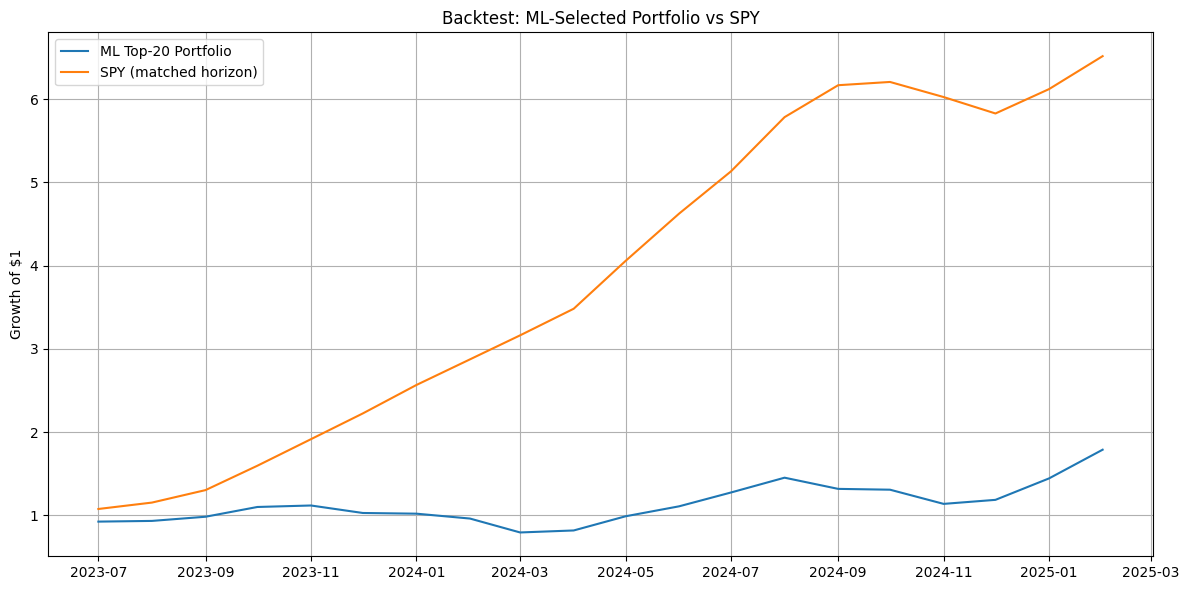

In [10]:
from pandas.tseries.offsets import BusinessDay

TOP_K = 20
COST  = 0.001
rf    = 0.0
HORIZON = H

# prepare scored test set
dates = sorted(dataset["Month"].unique())
cutoff = dates[int(len(dates)*0.8)]
test = dataset[dataset["Month"] > cutoff].copy()
test["proba"] = pipe.predict_proba(test[feature_cols])[:,1]

# SPY business-day series
spy_b = spy_clean.copy()
spy_b.index = pd.to_datetime(spy_b.index).tz_localize(None)
spy_b = spy_b.asfreq("B").ffill()

def spy_horizon_return(anchor_date, horizon):
    try: p0 = spy_b.asof(anchor_date)["SPY_Close"]
    except Exception: return 0.0
    fwd_date = anchor_date + BusinessDay(horizon)
    if fwd_date > spy_b.index[-1]: return 0.0
    try: p1 = spy_b.asof(fwd_date)["SPY_Close"]
    except Exception: return 0.0
    return float(p1/p0 - 1.0)

port_rets, spy_rets, rebal_dates = [], [], []
for m, grp in test.groupby("Month"):
    picks = grp.sort_values("proba", ascending=False).head(TOP_K)
    port_rets.append(picks["fwd_ret_H"].mean() - COST)
    spy_rets.append(spy_horizon_return(pd.Timestamp(m), HORIZON))
    rebal_dates.append(pd.Timestamp(m))

port_rets = pd.Series(port_rets, index=rebal_dates)
spy_rets  = pd.Series(spy_rets,  index=rebal_dates)

port_curve = (1+port_rets.fillna(0)).cumprod()
spy_curve  = (1+spy_rets.fillna(0)).cumprod()

def max_drawdown(curve):
    peak = curve.cummax(); dd = curve/peak - 1.0
    return float(dd.min())

periods_per_year = 252/HORIZON
years_elapsed = len(port_rets)/periods_per_year if periods_per_year>0 else np.nan

def metrics(returns, curve, name):
    r = returns.dropna()
    if len(r)==0: return {"Strategy":name,"CAGR":np.nan,"Sharpe":np.nan,"Vol (ann.)":np.nan,"Max DD":np.nan,"Win rate":np.nan,"# periods":0}
    final = float(curve.iloc[-1])
    cagr  = final**(1/years_elapsed)-1 if years_elapsed>0 else np.nan
    vol   = r.std(ddof=1)*np.sqrt(periods_per_year) if len(r)>1 else np.nan
    ex    = r - rf/periods_per_year
    sharpe= (ex.mean()/ex.std(ddof=1)*np.sqrt(periods_per_year)) if ex.std(ddof=1)>0 else np.nan
    return {"Strategy":name,"CAGR":cagr,"Sharpe":sharpe,"Vol (ann.)":vol,"Max DD":max_drawdown(curve),"Win rate":(r>0).mean(),"# periods":len(r)}

perf = pd.DataFrame([metrics(port_rets,port_curve,f"ML Top-{TOP_K}"), metrics(spy_rets,spy_curve,"SPY (H-horizon)")])
display(perf.style.format({"CAGR":"{:.2%}","Sharpe":"{:.2f}","Vol (ann.)":"{:.2%}","Max DD":"{:.2%}","Win rate":"{:.1%}","# periods":"{:d}"}))

plt.figure(figsize=(12,6))
plt.plot(port_curve.index, port_curve.values, label=f"ML Top-{TOP_K} Portfolio")
plt.plot(spy_curve.index,  spy_curve.values,  label="SPY (matched horizon)")
plt.title("Backtest: ML-Selected Portfolio vs SPY")
plt.ylabel("Growth of $1"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


,Feature,Importance (mean decrease in AUC),Std Dev
0,vol_63d,0.074387,0.008487
1,ret_252d,0.027655,0.004467
2,ret_126d,0.010911,0.004454
3,vol_21d,0.010303,0.005698
4,rel_mom_63d,0.007534,0.004989
5,dist_sma_50,0.002654,0.001945
6,atr_14,0.002094,0.005472
7,dist_sma_200,0.001336,0.001772
8,ret_21d,-0.000283,0.001591
9,ret_63d,-0.003123,0.002808


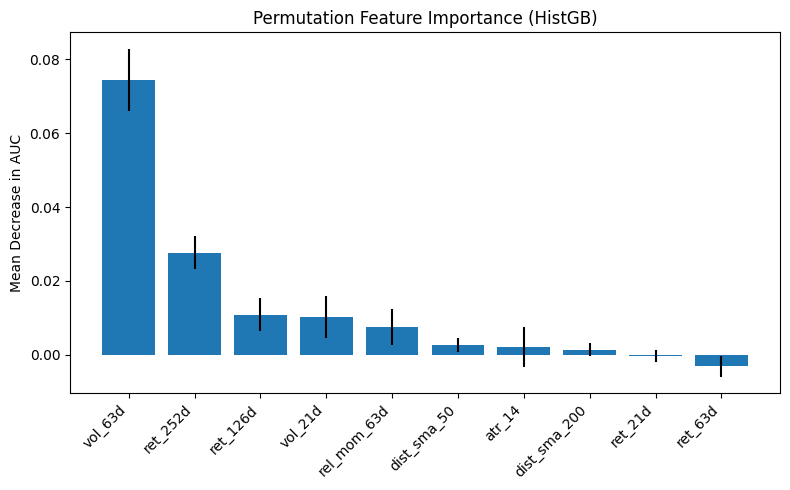

In [11]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipe, X_test, y_test, n_repeats=10, random_state=42, scoring="roc_auc"
)
sorted_idx = result.importances_mean.argsort()[::-1]
imp_df = pd.DataFrame({
    "Feature": np.array(feature_cols)[sorted_idx],
    "Importance (mean decrease in AUC)": result.importances_mean[sorted_idx],
    "Std Dev": result.importances_std[sorted_idx]
})
display(imp_df)

plt.figure(figsize=(8,5))
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx], yerr=result.importances_std[sorted_idx])
plt.xticks(range(len(sorted_idx)), np.array(feature_cols)[sorted_idx], rotation=45, ha="right")
plt.ylabel("Mean Decrease in AUC"); plt.title("Permutation Feature Importance (HistGB)")
plt.tight_layout(); plt.show()


In [12]:
# Build swing features
df = px_flat.sort_values(["Ticker","Date"]).copy()
df["ret_1d"] = df.groupby("Ticker")["Close"].pct_change()
df["vol_5"]  = df.groupby("Ticker")["ret_1d"].transform(lambda s: s.rolling(5).std())
df["vol_10"] = df.groupby("Ticker")["ret_1d"].transform(lambda s: s.rolling(10).std())
df["vol_20"] = df.groupby("Ticker")["ret_1d"].transform(lambda s: s.rolling(20).std())
for w in [5,10,20,50,200]:
    ma = df.groupby("Ticker")["Close"].transform(lambda s: s.rolling(w).mean())
    df[f"dist_sma_{w}"] = df["Close"]/(ma + 1e-12) - 1

def rsi(series, n=14):
    d = series.diff(); up = d.clip(lower=0); down = -d.clip(upper=0)
    ru = up.rolling(n).mean(); rd = down.rolling(n).mean()
    rs = ru/(rd + 1e-12); return 100 - (100/(1+rs))
df["rsi_14"] = df.groupby("Ticker")["Close"].transform(rsi)

ema12 = df.groupby("Ticker")["Close"].transform(lambda s: s.ewm(span=12, adjust=False).mean())
ema26 = df.groupby("Ticker")["Close"].transform(lambda s: s.ewm(span=26, adjust=False).mean())
df["macd"] = ema12 - ema26
df["macd_signal"] = df.groupby("Ticker")["macd"].transform(lambda s: s.ewm(span=9, adjust=False).mean())
df["macd_hist"] = df["macd"] - df["macd_signal"]

df["prev_close"] = df.groupby("Ticker")["Close"].shift(1)
hl = (df["High"]-df["Low"]).abs()
hc = (df["High"]-df["prev_close"]).abs()
lc = (df["Low"] -df["prev_close"]).abs()
df["tr"] = np.maximum.reduce([hl,hc,lc])
df["atr_14"] = df.groupby("Ticker")["tr"].transform(lambda s: s.rolling(14).mean())
df.drop(columns=["prev_close","tr"], inplace=True)

H_swing = 10
df["fwd_ret_swing"] = df.groupby("Ticker")["Close"].shift(-H_swing)/df["Close"] - 1
df["y_up_swing"]    = (df["fwd_ret_swing"] > 0).astype(int)

swing_features = [
    "ret_1d","vol_5","vol_10","vol_20",
    "dist_sma_5","dist_sma_10","dist_sma_20","dist_sma_50","dist_sma_200",
    "rsi_14","macd","macd_signal","macd_hist","atr_14","rel_mom_63d"
]

dates = np.array(sorted(df["Date"].unique()))
cut   = dates[int(len(dates)*0.8)]
train_s = df[(df["Date"] <= cut)].dropna(subset=swing_features + ["y_up_swing"])
test_s  = df[(df["Date"]  > cut)].dropna(subset=swing_features + ["y_up_swing"])

X_tr_s, y_tr_s = train_s[swing_features], train_s["y_up_swing"]
X_te_s, y_te_s = test_s[swing_features],  test_s["y_up_swing"]

swing_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale",  StandardScaler()),
    ("clf",    HistGradientBoostingClassifier(max_depth=6, learning_rate=0.05, max_iter=600, random_state=42))
])
swing_pipe.fit(X_tr_s, y_tr_s)
proba_te_s = swing_pipe.predict_proba(X_te_s)[:,1]
print("Swing AUC:", roc_auc_score(y_te_s, proba_te_s))
print(classification_report(y_te_s, (proba_te_s>=0.5).astype(int), digits=3))

# Today's swing picks (with quality filters)
latest_rows = df.sort_values(["Ticker","Date"]).groupby("Ticker").tail(1).copy()
mask_liquid = (latest_rows["Close"] >= 5) & (latest_rows["dist_sma_200"] > -0.2)
latest_rows = latest_rows[mask_liquid]
latest_rows["swing_score"] = swing_pipe.predict_proba(latest_rows[swing_features])[:,1]
swing_picks = latest_rows.sort_values("swing_score", ascending=False).head(25)
print("=== Top 25 Swing Picks (10-day horizon) ===")
display(swing_picks[["Ticker","Close","swing_score","rsi_14","dist_sma_50","vol_20"]].round(3))


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1098301739.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["ret_1d"] = df.groupby("Ticker")["Close"].pct_change()


Swing AUC: 0.495795715287116
              precision    recall  f1-score   support

           0      0.453     0.127     0.198     82179
           1      0.541     0.870     0.667     96974

    accuracy                          0.529    179153
   macro avg      0.497     0.499     0.433    179153
weighted avg      0.501     0.529     0.452    179153

=== Top 25 Swing Picks (10-day horizon) ===


,Ticker,Close,swing_score,rsi_14,dist_sma_50,vol_20
897640,KLAC,872.00,0.732,40.919,-0.034,0.025
897656,IDXX,647.09,0.728,46.567,0.113,0.065
897841,ORCL,226.13,0.719,27.195,-0.046,0.024
897804,LYB,56.35,0.712,84.989,-0.011,0.028
897846,SEDG,33.82,0.709,73.698,0.276,0.057
897771,WHR,93.15,0.699,75.638,-0.004,0.023
897707,NOC,590.04,0.677,61.249,0.072,0.006
897683,XOM,114.29,0.677,95.488,0.045,0.009
897543,ISRG,473.30,0.659,51.208,-0.053,0.010
897614,EOG,124.82,0.657,80.273,0.043,0.008


In [13]:
# ========= Section 9B: Enriched Swing Picks (10-day horizon) =========
import numpy as np
import pandas as pd

# -- 9B.1 Calibrate probability → expected return using OUT-OF-SAMPLE data (test_s) --
# add predicted probs for test_s if not present
if "proba_te_s" in locals():
    test_s = test_s.copy()
    test_s["proba"] = swing_pipe.predict_proba(test_s[swing_features])[:,1]
else:
    # fallback (shouldn't happen if you ran 9): compute now
    test_s = df[(df["Date"]  > cut)].dropna(subset=swing_features + ["y_up_swing"]).copy()
    test_s["proba"] = swing_pipe.predict_proba(test_s[swing_features])[:,1]

# Bin by probability deciles and compute average forward return + win rate
calib = (test_s
         .assign(bin=pd.qcut(test_s["proba"], 10, labels=False, duplicates="drop"))
         .groupby("bin")
         .agg(avg_ret=("fwd_ret_swing","mean"),
              win_rate=("y_up_swing","mean"),
              p_min = ("proba","min"),
              p_max = ("proba","max"),
              n     = ("proba","size"))
         .reset_index()
        )

# Build a smooth mapping via interpolation (probability midpoint → expected return / win rate)
calib = calib.sort_values("p_min").reset_index(drop=True)
calib["p_mid"] = (calib["p_min"] + calib["p_max"])/2
def _interp(series, values, x):
    # robust 1D interpolation with edge extrapolation by clamping
    x = np.clip(x, np.min(series), np.max(series))
    return float(np.interp(x, series, values))

def expected_ret_from_p(p):
    return _interp(calib["p_mid"].values, calib["avg_ret"].values, p)

def winrate_from_p(p):
    return _interp(calib["p_mid"].values, calib["win_rate"].values, p)

# -- 9B.2 Compute enriched columns for today's candidates --
enriched = latest_rows.copy()  # from Section 9 (latest_rows has one row per ticker today)
enriched = enriched.assign(
    confidence = enriched["swing_score"],                    # 0–1
    exp_ret_10d = enriched["swing_score"].apply(expected_ret_from_p),  # expected % return (decimal)
    exp_winrate = enriched["swing_score"].apply(winrate_from_p)        # calibrated win prob
)

# Risk controls from ATR
enriched["atr_pct"]   = (enriched["atr_14"] / enriched["Close"]).clip(lower=0)  # ATR as % of price
STOP_ATR_MULT = 1.5
enriched["stop_price"] = (enriched["Close"] * (1 - STOP_ATR_MULT * enriched["atr_pct"])).round(2)

# Targets from expected return (you can cap at, say, 2*ATR for realism)
CAP_ATR_MULT = 2.0
cap_return   = CAP_ATR_MULT * enriched["atr_pct"]            # cap expected move to avoid extreme targets
enriched["exp_ret_capped"] = np.minimum(enriched["exp_ret_10d"], cap_return)
enriched["target_price"]   = (enriched["Close"] * (1 + enriched["exp_ret_capped"])).round(2)

# Risk/Reward ratio using target vs stop
risk  = (enriched["Close"] - enriched["stop_price"]).replace(0, np.nan)
reward= (enriched["target_price"] - enriched["Close"])
enriched["R_R"] = (reward / risk).round(2)

# Friendly columns
enriched["expected_gain_%"] = (100 * enriched["exp_ret_capped"]).round(1)
enriched["time_horizon"]    = "10 trading days"

# -- 9B.3 Final display: top 25 by confidence (or expected gain) --
cols = ["Ticker","Close","confidence","expected_gain_%","target_price","stop_price","R_R",
        "time_horizon","rsi_14","dist_sma_50","dist_sma_200","vol_20","atr_pct"]
out = (enriched
       .sort_values(["confidence","expected_gain_%"], ascending=False)
       .loc[enriched.index.intersection(swing_picks.index)]   # keep same filtered set as Section 9
       [cols]
       .round({"Close":2,"atr_pct":3,"vol_20":3})
       .head(25))

print("=== Top 25 Swing Picks • with Targets, Confidence & Risk ===")
display(out)

# -- 9B.4 (Optional) Show the calibration table you learned from test data --
print("=== Probability→Return calibration (from test set) ===")
display(calib[["p_min","p_max","avg_ret","win_rate","n"]].round(3))


=== Top 25 Swing Picks • with Targets, Confidence & Risk ===


,Ticker,Close,confidence,expected_gain_%,target_price,stop_price,R_R,time_horizon,rsi_14,dist_sma_50,dist_sma_200,vol_20,atr_pct
897513,AMD,162.63,0.647883,0.6,163.65,153.13,0.11,10 trading days,40.804270,0.021897,0.297536,0.031,0.039
897556,AXP,331.28,0.633071,0.6,333.34,322.42,0.23,10 trading days,86.022625,0.067209,0.128129,0.012,0.018
897664,COP,98.97,0.633841,0.6,99.58,96.28,0.23,10 trading days,77.320946,0.058188,0.042970,0.009,0.018
897746,CVX,160.60,0.630723,0.6,161.60,157.15,0.29,10 trading days,75.145281,0.063862,0.089416,0.009,0.014
897647,DLTR,109.17,0.638049,0.6,109.85,105.03,0.16,10 trading days,31.661900,-0.005845,0.293024,0.011,0.025
897571,EMR,132.00,0.631370,0.6,132.82,128.81,0.26,10 trading days,51.608857,-0.036324,0.072260,0.015,0.016
897614,EOG,124.82,0.657248,0.6,125.60,121.73,0.25,10 trading days,80.273153,0.042951,0.034812,0.008,0.017
897842,FSLR,195.19,0.631003,0.6,196.40,179.08,0.08,10 trading days,56.336114,0.090983,0.180042,0.043,0.055
897674,HON,219.50,0.628324,0.6,220.86,215.52,0.34,10 trading days,60.785991,-0.026665,0.009033,0.009,0.012
897765,HOOD,104.03,0.654487,0.6,104.68,95.30,0.07,10 trading days,36.389431,0.026068,0.688712,0.033,0.056


=== Probability→Return calibration (from test set) ===


,p_min,p_max,avg_ret,win_rate,n
0,0.152,0.490,0.007,0.545,17916
1,0.490,0.518,0.008,0.547,17915
2,0.518,0.535,0.008,0.541,17915
3,0.535,0.548,0.007,0.546,17915
4,0.548,0.559,0.007,0.543,17916
5,0.559,0.570,0.007,0.542,17915
6,0.570,0.582,0.007,0.542,17915
7,0.582,0.597,0.006,0.533,17915
8,0.597,0.620,0.006,0.544,17915
9,0.620,0.947,0.007,0.530,17916


In [22]:
# ========= Section 9C: Big-Swing model (targets, confidence, risk) =========
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

# --- 9C.1: Start from your daily frame 'df' built in Section 9 ---
df2 = df.sort_values(["Ticker","Date"]).copy()

# Extra swing features (breakouts, band position, volume pressure, ADR%)
# Past momentum
for w in [3,5,10]:
    df2[f"ret_{w}d_past"] = df2.groupby("Ticker")["Close"].pct_change(w)

# Bollinger position (z) & Donchian breakout
mu20 = df2.groupby("Ticker")["Close"].transform(lambda s: s.rolling(20).mean())
sd20 = df2.groupby("Ticker")["Close"].transform(lambda s: s.rolling(20).std())
df2["bb_z20"] = (df2["Close"] - mu20) / (sd20 + 1e-12)

roll_max20 = df2.groupby("Ticker")["High"].transform(lambda s: s.rolling(20).max())
df2["breakout_20"] = df2["Close"] / (roll_max20 + 1e-12) - 1

# ADR% and volume Z-score
df2["adr_pct14"] = (df2["atr_14"] / df2["Close"]).clip(lower=0)
vmean20 = df2.groupby("Ticker")["Volume"].transform(lambda s: s.rolling(20).mean())
vstd20  = df2.groupby("Ticker")["Volume"].transform(lambda s: s.rolling(20).std())
df2["vol_z20"] = (df2["Volume"] - vmean20) / (vstd20 + 1e-12)

# --- 9C.2: Label "big swing up" (>= +3% in 10 trading days) ---
SWING_H = 10
SWING_THRESH = 0.03  # raise to 0.05 for >= +5% swings
df2["fwd_ret_10"] = df2.groupby("Ticker")["Close"].shift(-SWING_H)/df2["Close"] - 1
df2["y_bigup"] = (df2["fwd_ret_10"] >= SWING_THRESH).astype(int)

# --- 9C.3: Feature set geared for bigger moves ---
features_big = [
    "ret_1d","ret_3d_past","ret_5d_past","ret_10d_past",
    "vol_5","vol_10","vol_20","adr_pct14",
    "dist_sma_5","dist_sma_10","dist_sma_20","dist_sma_50","dist_sma_200",
    "bb_z20","breakout_20","vol_z20",
    "rsi_14","macd","macd_signal","macd_hist","rel_mom_63d"
]
# keep only existing columns (robustness)
features_big = [c for c in features_big if c in df2.columns]

# --- 9C.4: Time split, balance classes via sample weights ---
dates = np.array(sorted(df2["Date"].unique()))
cut   = dates[int(len(dates)*0.8)]
train_b = df2[(df2["Date"] <= cut)].dropna(subset=features_big + ["y_bigup"])
test_b  = df2[(df2["Date"]  > cut)].dropna(subset=features_big + ["y_bigup"])

Xtr, ytr = train_b[features_big], train_b["y_bigup"].astype(int)
Xte, yte = test_b[features_big],  test_b["y_bigup"].astype(int)

# class imbalance: weight positives higher
pos = ytr.sum(); neg = len(ytr) - pos
w_pos = (neg / (pos + 1e-9)) if pos > 0 else 1.0
sample_w = np.where(ytr == 1, w_pos, 1.0)

big_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler()),
    ("clf", HistGradientBoostingClassifier(max_depth=6, learning_rate=0.06, max_iter=700, random_state=42))
])
# pass weights only to the final estimator
big_pipe.fit(Xtr, ytr, clf__sample_weight=sample_w)
proba_big_te = big_pipe.predict_proba(Xte)[:,1]

print(f"BigSwing ROC AUC: {roc_auc_score(yte, proba_big_te):.3f}")
print(f"BigSwing PR AUC : {average_precision_score(yte, proba_big_te):.3f}")
print(f"Training positives (>= {int(SWING_THRESH*100)}% in 10d): {int(pos)} / {len(ytr)}")

# --- 9C.5: Probability → expected 10-day return calibration (on test set) ---
test_b = test_b.copy()
test_b["proba_big"] = proba_big_te
calib_big = (test_b
             .assign(bin=pd.qcut(test_b["proba_big"], 10, labels=False, duplicates="drop"))
             .groupby("bin")
             .agg(p_min=("proba_big","min"), p_max=("proba_big","max"),
                  avg_ret=("fwd_ret_10","mean"), win_rate=("y_bigup","mean"), n=("proba_big","size"))
             .sort_values("p_min").reset_index(drop=True))
calib_big["p_mid"] = (calib_big["p_min"] + calib_big["p_max"])/2

def _interp(xgrid, ygrid, x):
    x = np.clip(x, np.min(xgrid), np.max(xgrid))
    return float(np.interp(x, xgrid, ygrid))

def exp_ret_from_p_big(p):
    return _interp(calib_big["p_mid"].values, calib_big["avg_ret"].values, p)
def win_from_p_big(p):
    return _interp(calib_big["p_mid"].values, calib_big["win_rate"].values, p)

# --- 9C.6: Today’s high-volatility candidates (quality filters) ---
latest2 = df2.sort_values(["Ticker","Date"]).groupby("Ticker").tail(1).copy()

# Require liquidity/volatility so moves are big enough:
filt = (
    (latest2["Close"] >= 5) &
    (latest2["adr_pct14"] >= 0.02) &         # ADR >= 2% of price
    (latest2["vol_z20"].fillna(0) > -0.5)    # not extremely below-average volume
)
latest2 = latest2[filt].copy()

latest2["big_prob"] = big_pipe.predict_proba(latest2[features_big])[:,1]

# Expected 10-day return from calibrated mapping (raw, no ATR cap)
latest2["exp_ret_10d"] = latest2["big_prob"].apply(exp_ret_from_p_big).clip(lower=0)

# Risk controls via ATR; target/stop/R:R
STOP_ATR_MULT, TARGET_MIN = 1.5, SWING_THRESH   # base stop; target at least threshold
latest2["atr_pct"]   = latest2["adr_pct14"].clip(lower=0)
latest2["stop_price"] = (latest2["Close"] * (1 - STOP_ATR_MULT * latest2["atr_pct"])).round(2)

# ensure target at least the threshold swing
latest2["target_ret"]  = np.maximum(latest2["exp_ret_10d"], TARGET_MIN)
latest2["target_price"] = (latest2["Close"] * (1 + latest2["target_ret"])).round(2)

risk   = (latest2["Close"] - latest2["stop_price"]).replace(0, np.nan)
reward = (latest2["target_price"] - latest2["Close"])
latest2["R_R"] = (reward / risk).round(2)

# Pretty columns
latest2["expected_gain_%"] = (100 * latest2["target_ret"]).round(2)
latest2["confidence"]      = latest2["big_prob"].round(3)
latest2["time_horizon"]    = "10 trading days"

big_cols = [
    "Ticker","Close","confidence","expected_gain_%","target_price","stop_price","R_R","time_horizon",
    "adr_pct14","vol_z20","bb_z20","breakout_20","rsi_14","dist_sma_50","dist_sma_200"
]

big_swings = (latest2
              .sort_values(["confidence","expected_gain_%"], ascending=False)
              .head(25))[big_cols]

print(f"=== Top 25 Big-Swing Picks (>= {int(SWING_THRESH*100)}% over 10 days) ===")
display(big_swings.round({"Close":2,"adr_pct14":3,"vol_z20":2,"bb_z20":2,"breakout_20":3}))
print("\n=== Calibration (probability → realized 10-day return on test) ===")
display(calib_big.round(3))


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1904916866.py:16: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df2[f"ret_{w}d_past"] = df2.groupby("Ticker")["Close"].pct_change(w)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1904916866.py:16: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df2[f"ret_{w}d_past"] = df2.groupby("Ticker")["Close"].pct_change(w)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1904916866.py:16: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be remo

BigSwing ROC AUC: 0.564
BigSwing PR AUC : 0.364
Training positives (>= 3% in 10d): 193581 / 616558
=== Top 25 Big-Swing Picks (>= 3% over 10 days) ===


,Ticker,Close,confidence,expected_gain_%,target_price,stop_price,R_R,time_horizon,adr_pct14,vol_z20,bb_z20,breakout_20,rsi_14,dist_sma_50,dist_sma_200
897640,KLAC,872.00,0.758,3.0,898.16,836.81,0.74,10 trading days,0.027,0.07,-0.95,-0.089,40.918564,-0.033627,0.156946
897841,ORCL,226.13,0.714,3.0,232.91,214.08,0.56,10 trading days,0.036,2.08,-1.91,-0.125,27.194659,-0.046196,0.244370
897771,WHR,93.15,0.694,3.0,95.94,88.64,0.62,10 trading days,0.032,0.19,1.23,-0.020,75.638061,-0.003632,-0.019046
897610,LULU,202.20,0.674,3.0,208.27,192.70,0.64,10 trading days,0.031,-0.23,0.70,-0.028,64.244393,-0.063317,-0.333497
897621,NVDA,174.18,0.670,3.0,179.41,166.49,0.68,10 trading days,0.029,1.70,-2.01,-0.056,35.745311,0.021452,0.255441
897761,WBD,11.64,0.659,3.0,11.99,11.04,0.58,10 trading days,0.035,1.17,-0.39,-0.120,62.146898,-0.027975,0.111928
897844,LCID,19.80,0.656,3.0,20.39,18.40,0.42,10 trading days,0.047,1.60,-1.59,-0.203,34.328362,-0.151998,-0.201870
897499,SNOW,238.66,0.654,3.0,245.82,225.28,0.54,10 trading days,0.037,0.52,2.60,-0.045,81.860215,0.129728,0.325032
897647,DLTR,109.17,0.651,3.0,112.45,105.03,0.79,10 trading days,0.025,1.30,-2.35,-0.075,31.661900,-0.005845,0.293024
897780,CRM,256.25,0.649,3.0,263.94,247.60,0.89,10 trading days,0.023,-0.37,1.69,-0.005,77.235995,-0.003618,-0.117010



=== Calibration (probability → realized 10-day return on test) ===


,p_min,p_max,avg_ret,win_rate,n,p_mid
0,0.032,0.355,0.006,0.250,17916,0.193
1,0.355,0.392,0.004,0.252,17915,0.373
2,0.392,0.421,0.005,0.273,17915,0.406
3,0.421,0.449,0.005,0.281,17915,0.435
4,0.449,0.476,0.006,0.313,17916,0.462
5,0.476,0.503,0.007,0.320,17915,0.489
6,0.503,0.533,0.008,0.346,17915,0.518
7,0.533,0.567,0.008,0.353,17915,0.550
8,0.567,0.616,0.010,0.372,17915,0.591
9,0.616,0.940,0.011,0.394,17916,0.778


In [16]:
# ========= Section 9C-Filter: Picks with expected > 3% in 10 trading days =========
import numpy as np
import pandas as pd

# 1) Make sure we have the objects from 9C (model, features, daily frame, calibration)
assert 'df2' in globals() and 'features_big' in globals() and 'big_pipe' in globals() and 'calib_big' in globals(), \
    "Run Section 9C first."

# Helper from 9C: prob -> expected 10-day return via out-of-sample calibration
def _interp(xgrid, ygrid, x):
    x = np.clip(x, np.min(xgrid), np.max(xgrid))
    return float(np.interp(x, xgrid, ygrid))

def exp_ret_from_p_big(p):
    return _interp(calib_big["p_mid"].values, calib_big["avg_ret"].values, p)

# 2) Build today’s candidate set (same quality filters as 9C)
latest2 = df2.sort_values(["Ticker","Date"]).groupby("Ticker").tail(1).copy()
filt = (
    (latest2["Close"] >= 5) &
    (latest2["adr_pct14"] >= 0.02) &           # ADR >= 2%
    (latest2["vol_z20"].fillna(0) > -0.5)      # not super-low volume
)
latest2 = latest2[filt].copy()

# 3) Score & convert to expected 10-day return (NO floor/cap)
latest2["big_prob"]   = big_pipe.predict_proba(latest2[features_big])[:, 1]
latest2["exp_ret_10d"] = latest2["big_prob"].apply(exp_ret_from_p_big)

# 4) Keep only names with model-implied expected return > 3%
THRESH = 0.03
picks_gt3 = latest2[latest2["exp_ret_10d"] > THRESH].copy()

# 5) Targets / stops / risk-reward
STOP_ATR_MULT = 1.5
picks_gt3["atr_pct"]    = (picks_gt3["atr_14"] / picks_gt3["Close"]).clip(lower=0)
picks_gt3["stop_price"] = (picks_gt3["Close"] * (1 - STOP_ATR_MULT * picks_gt3["atr_pct"])).round(2)
picks_gt3["target_price"] = (picks_gt3["Close"] * (1 + picks_gt3["exp_ret_10d"])).round(2)
risk   = (picks_gt3["Close"] - picks_gt3["stop_price"]).replace(0, np.nan)
reward = (picks_gt3["target_price"] - picks_gt3["Close"])
picks_gt3["R_R"] = (reward / risk).round(2)

# 6) Pretty output
picks_gt3["expected_gain_%"] = (100 * picks_gt3["exp_ret_10d"]).round(2)
picks_gt3["confidence"]      = picks_gt3["big_prob"].round(3)
picks_gt3["time_horizon"]    = "10 trading days"

cols = ["Ticker","Close","confidence","expected_gain_%","target_price","stop_price","R_R",
        "time_horizon","adr_pct14","vol_z20","bb_z20","breakout_20","rsi_14","dist_sma_50","dist_sma_200"]
picks_gt3 = picks_gt3.sort_values(["exp_ret_10d","big_prob"], ascending=False)

print(f"=== Big-Swing Picks with expected > 3% in 10 days (n={len(picks_gt3)}) ===")
display(picks_gt3[cols].round({"Close":2,"adr_pct14":3,"vol_z20":2,"bb_z20":2,"breakout_20":3}).head(25))


=== Big-Swing Picks with expected > 3% in 10 days (n=0) ===


,Ticker,Close,confidence,expected_gain_%,target_price,stop_price,R_R,time_horizon,adr_pct14,vol_z20,bb_z20,breakout_20,rsi_14,dist_sma_50,dist_sma_200


In [18]:
pip install yahoo_fin


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6089 sha256=2c693c14b65c8054325f436ae97f85b54e05f9f9685bfba7e756b45d11cf3029
  Stored in directory: /Users/benmartin/Library/Caches/pip/wheels/3d/4d/ef/37cdccc18d6fd7e0dd7817dcdf9146d4d6789c32a227a28134
  Created wheel for websockets: filename=websockets-10.4-cp313-cp313-macosx_10_13_universal2.whl size=100233 sha256=f59669fa0adb43e977a6e199e8590237f8d37bdae0de490af7d2cf952f85dbd0
  Stored in directory: /Users/benmartin/Library/Caches/pip/wheels/f5/dd/43/5b7132085406a982d2e0dd808f0ffed137865c8a8c5c7a5e4b
Successfully built sgmllib3k websockets
  Attempting uninstall: w

In [21]:
# ==== Add-on: append extra tickers (column-style) WITHOUT changing earlier code ====

# 1) Paste your extra tickers here (one per line). You can add/remove lines freely.
EXTRA_TICKERS_COLUMN = """
AAL
AAP
ABB
ABNB
ADI
AEP
AFRM
AIG
AJG
ALLY
AMAT
AMCR
ANET
ANSS
APA
APH
APTV
ARCC
ARE
ATVI
AVTR
AXS
BALL
BAX
BBWI
BDX
BEN
BIIB
BKR
BK
BKNG
BLD
BLDR
BLL
BMY
BR
BRK-A
BRK-B
BX
BYND
CACI
CAG
CAH
CARR
CBOE
CBRE
CDAY
CDW
CF
CHD
CHTR
CINF
CMI
CNC
CNP
COF
COKE
COLM
COO
CPRT
CPRI
CRI
CRL
CRWD
CSIQ
CTSH
CTVA
CZAR
CZR
DAL
DDOG
DECK
DELL
DFS
DG
DHI
DHR
DKS
DOCU
DPZ
DVN
EBAY
EDU
EFX
EIX
EMN
ENPH
EOG
EPAM
EQH
EQT
ESTC
ETSY
EXPE
FANG
FAST
FDX
FE
FFIV
FIS
FITB
FIVE
FLS
FMC
FNF
FOX
FTNT
FTV
GDDY
GDRX
GEHC
GEN
GGG
GILD
GLPI
GMED
GNRC
GPC
GPN
GRMN
HAL
HAS
HBAN
HIG
HOLX
HON
HOOD
HPQ
HRL
HST
HUBS
HWM
IAC
ICLR
IEX
IFF
IRM
ISRG
IT
ITW
JKHY
JBL
JNPR
K
KDP
KEYS
KKR
KMX
KRYS
KRTX
KSS
LAMR
LDOS
LEA
LEN
LH
LHX
LII
LNTH
LNT
LYFT
MAA
MAS
MCK
MELI
MET
MHK
MNDY
MOH
MDB
MPWR
MRO
MRVL
MSI
MTN
NDAQ
NFLX
NOK
NRG
NTAP
NVR
NXPI
ODFL
OKE
OMC
ON
ONON
ORLY
PANW
PARA
PATH
PAYC
PCAR
PCTY
PEGA
PENN
PKI
PLTR
POOL
PPG
PTON
PWR
QRVO
RBLX
RCL
RHI
RMD
ROK
ROKU
RPM
RSG
SABR
SE
SEDG
SHOP
SMCI
SNAP
SNOW
SOFI
SONY
SPLK
SPOT
SSNC
STX
SWKS
SYF
TFC
TJX
TMUS
TRMB
TRV
TSCO
TT
TWLO
TXG
UHS
ULTA
UPS
USB
VEEV
WAB
WBA
WELL
WHR
WM
WOOF
WST
WY
XEL
ZBH
ZBRA
ZM
ZS
"""

# 2) Use your previous normalization helpers if they exist; else define here (no imports repeated).
def _to_yahoo(sym: str) -> str:
    return sym.replace(".", "-").strip().upper()

def _plausible(sym: str) -> bool:
    # keep typical US listings: A–Z and optional single dash; length <= 6
    if not sym: return False
    if len(sym) > 6: return False
    return all(ch.isalpha() or ch == "-" for ch in sym)

# 3) Parse the column block
addon_tokens = [line.strip() for line in EXTRA_TICKERS_COLUMN.strip().splitlines() if line.strip()]
addon_list   = [_to_yahoo(t) for t in addon_tokens if _plausible(_to_yahoo(t))]

# 4) Merge with existing `tickers` (created earlier in your notebook)
try:
    base = set(tickers)  # your current universe
except NameError:
    base = set()

tickers = sorted(base | set(addon_list))  # update in place without changing other code
print(f"Expanded universe size: {len(tickers)}")

# Optional quick peek
print("Sample:", tickers[:20])


Expanded universe size: 521
Sample: ['A', 'AAL', 'AAP', 'AAPL', 'ABB', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AFL', 'AFRM', 'AI', 'AIG']


In [23]:
# ==== A) Fetch daily OHLCV for the universe ====
# Uses your existing `tickers` list. Edit CHUNK or PERIOD if needed.

PERIOD = "5y"   # more history = better calibration
CHUNK  = 50     # avoid throttling

def dl_chunk(symbols):
    df = yf.download(symbols, period=PERIOD, interval="1d",
                     auto_adjust=True, group_by="ticker",
                     threads=False, progress=False)
    frames = []
    for t in symbols:
        try:
            # yfinance can nest columns in 2 ways; handle both:
            sub = df[t] if t in getattr(df.columns, "levels", [[None]])[0] else df.xs(t, axis=1, level=1)
            sub = sub[["Open","High","Low","Close","Volume"]].dropna(how="all").copy()
            sub["Ticker"] = t
            frames.append(sub)
        except Exception:
            pass
    if frames:
        out = pd.concat(frames)
        out.index.names = ["Date"]
        return out
    return pd.DataFrame(columns=["Open","High","Low","Close","Volume","Ticker"])

all_frames = []
for i in range(0, len(tickers), CHUNK):
    batch = tickers[i:i+CHUNK]
    data  = dl_chunk(batch)
    if not data.empty:
        all_frames.append(data)
    # (Optional) small sleep if you get throttled
    # time.sleep(0.1)

ohlc = pd.concat(all_frames).sort_index()
ohlc = ohlc.reset_index().set_index(["Date","Ticker"]).sort_index()
print("Symbols downloaded:", ohlc.reset_index()["Ticker"].nunique(), "Rows:", len(ohlc))



2 Failed downloads:
['ATVI', 'ABB']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

3 Failed downloads:
['BLL', 'CDAY', 'BMWYY']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['DFS']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

3 Failed downloads:
['FLT', 'FISV', 'FCAU']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

1 Failed download:
['KRTX']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")')

2 Failed downloads:
['MRO', 'NKLA']: YFPricesMissingError('possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol 

Symbols downloaded: 505 Rows: 630567


In [24]:
# ==== B) Build features + detect patterns + produce signals ====

df = ohlc.reset_index().sort_values(["Ticker","Date"]).copy()
g  = df.groupby("Ticker", sort=False)

# Core helpers
def rsi_close(s, n=14):
    d = s.diff()
    up, dn = d.clip(lower=0), -d.clip(upper=0)
    ru = up.rolling(n).mean()
    rd = dn.rolling(n).mean()
    rs = ru / (rd + 1e-12)
    return 100 - (100/(1+rs))

# ATR(14)
prev_close = g["Close"].shift(1)
tr = pd.concat([
    (df["High"]-df["Low"]).abs(),
    (df["High"]-prev_close).abs(),
    (df["Low"] -prev_close).abs()
], axis=1).max(axis=1)
df["ATR14"] = g.apply(lambda s: s.assign(tr=tr.loc[s.index]).set_index("Date")["tr"].rolling(14).mean().values)

# Moving averages / trend context
for w in [20, 50, 200]:
    df[f"SMA{w}"] = g["Close"].transform(lambda s: s.rolling(w).mean())
df["dist_sma20"]  = df["Close"]/(df["SMA20"] + 1e-12) - 1
df["dist_sma50"]  = df["Close"]/(df["SMA50"] + 1e-12) - 1
df["dist_sma200"] = df["Close"]/(df["SMA200"]+ 1e-12) - 1
df["RSI14"] = g["Close"].transform(rsi_close)

# Volume z-score (20d)
vmean20 = g["Volume"].transform(lambda s: s.rolling(20).mean())
vstd20  = g["Volume"].transform(lambda s: s.rolling(20).std())
df["vol_z20"] = (df["Volume"] - vmean20) / (vstd20 + 1e-12)

# --- Candlestick rules (bullish variants) ---
O, H, L, C = df["Open"], df["High"], df["Low"], df["Close"]
C1, O1, H1, L1 = C.shift(1), O.shift(1), H.shift(1), L.shift(1)

body   = (C - O).abs()
range_ = (H - L).replace(0, np.nan)
upper  = (H - C).where(C>=O, (H - O))
lower  = (O - L).where(C>=O, (C - L))

# 1) Bullish Engulfing
bull_engulf = (C > O) & (C1 < O1) & (C >= O1) & (O <= C1)

# 2) Hammer (long lower shadow, small body, small upper shadow) in/near downtrend
hammer = (lower >= 2*body) & (upper <= 0.25*body) & (df["dist_sma20"] < 0)

# 3) Morning Star (approx): long red, small gap-down body, long green that closes > midpoint of first
red1   = (C1 < O1)
small2 = (body.shift(0) / range_.shift(0)) < 0.3
gapdn  = O < C1  # approximate gap down
green3 = (C > O) & (C >= (O1 + C1)/2)
morning_star = red1.shift(1).fillna(False) & small2 & gapdn & green3

# 4) Bullish Outside Bar (engulfing range) that closes strong
outside_up = (H > H1) & (L < L1) & (C > O) & (C > C1)

# 5) Inside Bar (range contraction); signal when breakout up (today close > prior high)
inside     = (H < H1) & (L > L1)
inside_up  = inside & (C > H1)

# 6) Doji near support (small body, long shadows) with bullish close vs open
doji = (body / range_ <= 0.1) & (df["dist_sma20"] < 0.01) & (C > O)

# Combine bullish pattern flags
df["pat_bull_engulf"] = bull_engulf.astype(int)
df["pat_hammer"]      = hammer.astype(int)
df["pat_morning"]     = morning_star.astype(int)
df["pat_outside_up"]  = outside_up.astype(int)
df["pat_inside_up"]   = inside_up.astype(int)
df["pat_doji"]        = doji.astype(int)

# Confirmation: trend or volume
trend_ok  = (df["dist_sma20"] > -0.02) | (df["dist_sma50"] > 0)  # near/above trend
vol_ok    = (df["vol_z20"] > 0.5) | (C > H1)                      # volume surge or breakout close
confirm   = trend_ok & vol_ok

# One pattern name per row (priority order)
pat_cols = ["pat_bull_engulf","pat_morning","pat_hammer","pat_outside_up","pat_inside_up","pat_doji"]
pat_names= ["Bullish Engulfing","Morning Star","Hammer","Outside Up","Inside-Up Breakout","Doji Reversal"]

best_pat_idx = np.argmax(df[pat_cols].values, axis=1)
df["pattern_name"] = np.select(
    [df[c].astype(bool).values for c in pat_cols],
    pat_names,
    default=""
)

# Final BUY signal when any bullish pattern fires + confirmation
df["buy_signal"] = (df[pat_cols].sum(axis=1) > 0) & confirm

# Forward returns for calibration (5/10 bars)
for h in [5,10]:
    df[f"fwd_ret_{h}"] = g["Close"].shift(-h)/df["Close"] - 1

print("Signals found:", int(df["buy_signal"].sum()))


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2323800669.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["ATR14"] = g.apply(lambda s: s.assign(tr=tr.loc[s.index]).set_index("Date")["tr"].rolling(14).mean().values)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/2323800669.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  morning_star = red1.shift(1).fillna(False) & small2 & gapdn & green3


Signals found: 25094


In [29]:
# ==== C) Calibrate & produce actionable picks (entry, target, expected gain, stop) ====

# Historical calibration on past signals
hist = df[df["buy_signal"]].copy()
hist = hist.dropna(subset=["fwd_ret_10", "pattern_name"])  # avoid look-ahead tail

# Pattern-level stats (10-day horizon)
perf = (
    hist.groupby("pattern_name")
        .agg(
            n=("fwd_ret_10", "size"),
            win_rate=("fwd_ret_10", lambda s: (s > 0).mean()),
            avg_gain=("fwd_ret_10", "mean"),
            pos_avg=("fwd_ret_10", lambda s: s[s > 0].mean() if (s > 0).any() else np.nan),
            neg_avg=("fwd_ret_10", lambda s: s[s <= 0].mean() if (s <= 0).any() else np.nan),
        )
        .sort_values("avg_gain", ascending=False)
)

print("=== Pattern calibration (10d forward) ===")
display(perf.round(3))

# Today's candidates (last available date per ticker)
latest = (
    df.sort_values(["Ticker", "Date"])
      .groupby("Ticker", as_index=False)
      .tail(1)
      .copy()
)

today_picks = latest[latest["buy_signal"]].copy()
if today_picks.empty:
    print("No fresh buy signals today.")
else:
    # Map expected gain/confidence from pattern stats; fallback to global mean
    global_avg = float(hist["fwd_ret_10"].mean()) if not hist.empty else 0.0
    global_win = float((hist["fwd_ret_10"] > 0).mean()) if not hist.empty else 0.5

    pat_to_gain = perf["avg_gain"].to_dict()
    pat_to_win  = perf["win_rate"].to_dict()

    today_picks["exp_ret_10d"] = today_picks["pattern_name"].map(pat_to_gain).fillna(global_avg)
    today_picks["confidence"]  = today_picks["pattern_name"].map(pat_to_win).fillna(global_win)

    # --- dtype fix: coerce to numeric and compute prices safely ---
    for c in ["Close", "ATR14", "exp_ret_10d"]:
        if c in today_picks.columns:
            today_picks[c] = pd.to_numeric(today_picks[c], errors="coerce")

    STOP_ATR = 1.0   # 1× ATR below entry
    TARGET_R = 2.0   # 2× ATR target (≈ 2R)

    # ATR as % of price (safe)
    atr_pct = (today_picks["ATR14"] / today_picks["Close"]).astype(float).clip(lower=0)

    # Use numpy to avoid Series .round dtype issues
    entry = today_picks["Close"].astype(float).to_numpy()
    exp10 = today_picks["exp_ret_10d"].fillna(0).astype(float).to_numpy()

    today_picks["entry_price"]  = np.round(entry, 2)
    today_picks["stop_price"]   = np.round(entry * (1 - STOP_ATR * atr_pct.to_numpy()), 2)
    today_picks["target_price"] = np.round(entry * (1 + TARGET_R * atr_pct.to_numpy()), 2)
    today_picks["calib_target"] = np.round(entry * (1 + exp10), 2)

    # Reward:Risk vs ATR stop
    risk   = today_picks["entry_price"] - today_picks["stop_price"]
    reward = today_picks["target_price"] - today_picks["entry_price"]
    today_picks["R_R_ATR2R"] = (reward / risk.replace(0, np.nan)).round(2)

    # Pretty output
    cols = [
        "Ticker","pattern_name","entry_price",
        "target_price","calib_target","stop_price","R_R_ATR2R",
        "exp_ret_10d","confidence","RSI14","dist_sma20","dist_sma50","dist_sma200","vol_z20"
    ]
    out = today_picks[cols].sort_values(["exp_ret_10d","confidence"], ascending=False).copy()
    out["expected_gain_%"] = (100 * out["exp_ret_10d"]).round(2)
    out["time_horizon"]    = "≈10 trading days"

    print("=== Today’s actionable candlestick buys ===")
    display(out.drop(columns=["exp_ret_10d"]).round(3).head(25))


=== Pattern calibration (10d forward) ===


,n,win_rate,avg_gain,pos_avg,neg_avg
pattern_name,,,,,
Doji Reversal,2658,0.542,0.005,0.050,-0.048
Morning Star,1529,0.536,0.004,0.051,-0.051
Bullish Engulfing,11681,0.530,0.003,0.051,-0.050
Outside Up,8340,0.525,0.002,0.050,-0.050
Hammer,695,0.512,0.001,0.046,-0.046


=== Today’s actionable candlestick buys ===


Price,Ticker,pattern_name,entry_price,target_price,calib_target,stop_price,R_R_ATR2R,confidence,RSI14,dist_sma20,dist_sma50,dist_sma200,vol_z20,expected_gain_%,time_horizon
630087,ALL,Doji Reversal,203.45,NaN,204.55,NaN,NaN,0.542,45.938,-0.009,0.023,0.038,-0.749,0.54,≈10 trading days
630318,K,Doji Reversal,79.50,NaN,79.93,NaN,NaN,0.542,29.252,-0.006,-0.003,-0.014,1.967,0.54,≈10 trading days
630411,OKTA,Doji Reversal,92.77,NaN,93.27,NaN,NaN,0.542,63.515,0.007,-0.023,-0.041,1.167,0.54,≈10 trading days
630232,EW,Morning Star,81.34,NaN,81.65,NaN,NaN,0.536,68.109,0.023,0.039,0.099,-0.912,0.38,≈10 trading days
630479,SNOW,Morning Star,238.66,NaN,239.57,NaN,NaN,0.536,81.860,0.180,0.130,0.325,0.520,0.38,≈10 trading days
630112,BALL,Bullish Engulfing,52.64,NaN,52.81,NaN,NaN,0.530,43.609,-0.016,-0.063,-0.027,-0.719,0.33,≈10 trading days
630158,CMCSA,Bullish Engulfing,33.97,NaN,34.08,NaN,NaN,0.530,74.151,0.028,-0.003,-0.044,-0.977,0.33,≈10 trading days
630164,CNP,Bullish Engulfing,37.71,NaN,37.83,NaN,NaN,0.530,39.714,-0.011,0.013,0.084,0.754,0.33,≈10 trading days
630168,COLM,Bullish Engulfing,55.72,NaN,55.90,NaN,NaN,0.530,75.913,0.051,-0.029,-0.222,1.223,0.33,≈10 trading days
630201,DIS,Bullish Engulfing,118.38,NaN,118.77,NaN,NaN,0.530,71.017,0.017,-0.005,0.082,-0.732,0.33,≈10 trading days


In [46]:
# ===== Ultra-robust pf builder (handles Date missing/index/MultiIndex; no merge_asof) =====
import pandas as pd
import numpy as np
import yfinance as yf

# ---------- 0) Grab your raw prices from px_flat or px ----------
src = None
if "px_flat" in globals():
    src = px_flat.copy()
elif "px" in globals():
    # If px is a MultiIndex (Date, Ticker) or similar, flatten it
    src = px.copy()
    if isinstance(src.index, pd.MultiIndex):
        src = src.reset_index()
else:
    raise RuntimeError("I need either px_flat or px defined with your prices.")

print(">> Incoming columns:", list(src.columns))
print(">> First 3 rows:")
print(src.head(10))

# ---------- 1) Normalize column names (case-insensitive lookup) ----------
def find_col(df, candidates):
    cols = {c.lower(): c for c in df.columns}
    for name in candidates:
        if name.lower() in cols:
            return cols[name.lower()]
    return None

# Ensure we have Date as a real column
date_col = find_col(src, ["Date", "Datetime", "Time", "Timestamp"])
if date_col is None:
    # Try to build Date from the index
    if isinstance(src.index, pd.DatetimeIndex):
        src = src.reset_index().rename(columns={"index": "Date"})
        date_col = "Date"
    else:
        # Some files keep a generic 'index' column that is datetime-like
        if "index" in src.columns:
            try:
                pd.to_datetime(src["index"])
                src = src.rename(columns={"index": "Date"})
                date_col = "Date"
            except Exception:
                pass

# If still no Date, fall back to first column if it parses as datetime
if date_col is None:
    c0 = src.columns[0]
    try:
        pd.to_datetime(src[c0])
        src = src.rename(columns={c0: "Date"})
        date_col = "Date"
    except Exception:
        pass

if date_col is None:
    raise RuntimeError(
        "Could not find a Date-like column. Available columns: "
        + ", ".join(map(str, src.columns))
    )

# Ensure we have Ticker
ticker_col = find_col(src, ["Ticker", "Symbol", "Security", "Name"])
if ticker_col is None:
    # If a MultiIndex was flattened, there might be a level_1 or similar
    guess = [c for c in src.columns if "ticker" in c.lower() or "symbol" in c.lower()]
    if guess:
        ticker_col = guess[0]
    else:
        raise RuntimeError(
            "Could not find a Ticker/Symbol column. Available columns: "
            + ", ".join(map(str, src.columns))
        )

# Ensure we have Close (fallback to Adj Close)
close_col = find_col(src, ["Close", "Adj Close", "close", "adj_close"])
if close_col is None:
    raise RuntimeError(
        "Could not find a Close/Adj Close column. Available columns: "
        + ", ".join(map(str, src.columns))
    )

# Volume optional
vol_col = find_col(src, ["Volume", "Vol"])

# ---------- 2) Build a clean price frame with Date/Ticker/Close/(Volume) ----------
dfp = src[[date_col, ticker_col, close_col] + ([vol_col] if vol_col else [])].copy()
dfp.columns = ["Date", "Ticker", "Close"] + (["Volume"] if vol_col else [])
dfp["Date"] = pd.to_datetime(dfp["Date"], errors="coerce").dt.tz_localize(None)
dfp = dfp.dropna(subset=["Date", "Close"]).sort_values(["Ticker", "Date"]).reset_index(drop=True)

print(">> Normalized dfp columns:", list(dfp.columns))
print(">> Sample after normalize:")
print(dfp.head(10))

# ---------- 3) Download SPY and create a clean Date/SPY_Close frame ----------
spy = yf.download("SPY", period="10y", auto_adjust=True, progress=False, threads=False)[["Close"]].copy()
if spy.empty:
    raise RuntimeError("SPY download returned empty (network?).")
spy = spy.reset_index()         # yfinance index -> 'Date' column
# If first column isn't named Date for any reason, rename it
if "Date" not in spy.columns:
    spy.rename(columns={spy.columns[0]: "Date"}, inplace=True)
spy.rename(columns={"Close": "SPY_Close"}, inplace=True)
spy["Date"] = pd.to_datetime(spy["Date"], errors="coerce").dt.tz_localize(None)
spy = spy.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

# ---------- 4) Fast attach: forward-fill map SPY onto each price row's Date ----------
spy_s = spy.set_index("Date")["SPY_Close"].sort_index()
dfp["SPY_Close"] = spy_s.reindex(dfp["Date"], method="ffill").to_numpy()

# ---------- 5) Final pf ----------
pf = dfp.dropna(subset=["Close", "SPY_Close"]).reset_index(drop=True)

print("\n✅ Built pf successfully.")
print("pf shape:", pf.shape)
print("pf columns:", pf.columns.tolist())
print(pf.head(10))


>> Incoming columns: ['Date', 'Ticker', 'Close', 'High', 'Low', 'Volume', 'ret_1d', 'ret_21d', 'ret_63d', 'ret_126d', 'ret_252d', 'vol_21d', 'vol_63d', 'dist_sma_50', 'dist_sma_200', 'atr_14', 'SPY_Close', 'rel_px', 'rel_mom_63d', 'fwd_ret_H', 'Month']
>> First 3 rows:
        Date Ticker       Close        High         Low      Volume  ret_1d  \
0 2015-08-31      A   33.463596   33.684780   33.131817   2554700.0     NaN   
1 2015-08-31   DDOG         NaN         NaN         NaN         NaN     NaN   
2 2015-08-31    ELV  123.031898  125.334657  122.072410   3228500.0     NaN   
3 2015-08-31    PEG   28.382729   28.551968   27.952580   4389100.0     NaN   
4 2015-08-31   EXPE  109.205391  110.639432  108.312683   1026900.0     NaN   
5 2015-08-31    COP   36.010933   36.135486   33.483207  17775100.0     NaN   
6 2015-08-31   SNAP         NaN         NaN         NaN         NaN     NaN   
7 2015-08-31   ZBRA   82.879997   83.930000   81.769997    459800.0     NaN   
8 2015-08-31     CL

KeyError: ['Date']

In [47]:
print(pf.dtypes)
print(pf.head(10))
print(pf.tail(10))
print(f"Tickers: {pf['Ticker'].nunique()} | Date range: {pf['Date'].min()} → {pf['Date'].max()}")


Date            datetime64[ns]
Ticker                  object
Close                  float64
High                   float64
Low                    float64
Volume                 float64
ret_1d                 float64
ret_21d                float64
ret_63d                float64
ret_126d               float64
ret_252d               float64
vol_21d                float64
vol_63d                float64
dist_sma_50            float64
dist_sma_200           float64
atr_14                 float64
SPY_Close_x            float64
rel_px                 float64
rel_mom_63d            float64
fwd_ret_H              float64
Month            datetime64[s]
SPY_Close_y            float64
dtype: object
        Date Ticker       Close        High         Low      Volume  ret_1d  \
0 2015-08-31      A   33.463596   33.684780   33.131817   2554700.0     NaN   
1 2015-08-31   DDOG         NaN         NaN         NaN         NaN     NaN   
2 2015-08-31    ELV  123.031898  125.334657  122.072410   3228500.0

In [48]:
# =========================
# Section C: Swing + Growth (clean, self-contained)
# Requires: pf with columns ['Date','Ticker','Close'] and ideally ['High','Low','Volume','SPY_Close']
# =========================
import pandas as pd
import numpy as np

# -------- Helpers --------
def rsi(close, n=14):
    d = close.diff()
    up = d.clip(lower=0.0)
    dn = -d.clip(upper=0.0)
    roll_up = up.ewm(alpha=1/n, adjust=False).mean()
    roll_dn = dn.ewm(alpha=1/n, adjust=False).mean()
    rs = roll_up / (roll_dn + 1e-12)
    return 100 - (100/(1+rs))

def compute_atr(df, n=14):
    # Prefer real ATR if High/Low available; fallback to return-vol * price
    if {"High","Low","Close"}.issubset(df.columns):
        prev_c = df["Close"].shift(1)
        tr = pd.concat([
            (df["High"] - df["Low"]).abs(),
            (df["High"] - prev_c).abs(),
            (df["Low"]  - prev_c).abs()
        ], axis=1).max(axis=1)
        return tr.rolling(n, min_periods=n).mean()
    # Fallback: ATR ≈ rolling stdev of returns * Close
    ret = df["Close"].pct_change().abs()
    return (ret.rolling(n, min_periods=n).std() * df["Close"])

def zscore(s):
    m, sd = np.nanmean(s), np.nanstd(s)
    return (s - m) / (sd + 1e-12)

def last_per_ticker(df):
    return (df.sort_values(["Ticker","Date"])
              .groupby("Ticker", as_index=False, sort=False)
              .tail(1))

# Ensure types
pf = pf.copy()
pf["Date"] = pd.to_datetime(pf["Date"], errors="coerce")
pf = pf.dropna(subset=["Date","Close"]).sort_values(["Ticker","Date"]).reset_index(drop=True)

g = pf.groupby("Ticker", sort=False)

# -------- Common features (reused) --------
pf["ret_1d"]   = g["Close"].pct_change()
pf["ret_5d"]   = g["Close"].pct_change(5)
pf["ret_10d"]  = g["Close"].pct_change(10)
pf["fwd_ret_10"]  = g["Close"].shift(-10) / pf["Close"] - 1
pf["fwd_ret_12m"] = g["Close"].shift(-252) / pf["Close"] - 1

# SMAs
for w in (20,50,200,400):
    sma = g["Close"].transform(lambda s: s.rolling(w, min_periods=w).mean())
    pf[f"dist_sma_{w}"] = pf["Close"]/(sma + 1e-12) - 1

# Bollinger (20)
mid20 = g["Close"].transform(lambda s: s.rolling(20, min_periods=20).mean())
std20 = g["Close"].transform(lambda s: s.rolling(20, min_periods=20).std())
pf["bb_pos"] = (pf["Close"] - mid20) / (2*std20 + 1e-12)         # -1 near lower band, +1 near upper
pf["bb_z20"] = (pf["Close"] - mid20) / (std20 + 1e-12)           # z vs 20d mean

# RSI & ATR
pf["rsi_14"] = g.apply(lambda d: rsi(d["Close"], 14)).reset_index(level=0, drop=True)
pf["ATR14"]  = g.apply(lambda d: compute_atr(d, 14)).reset_index(level=0, drop=True)
atr_pct = (pf["ATR14"] / pf["Close"]).replace([np.inf, -np.inf], np.nan)

# Volume zscore (optional; if Volume missing, fill 0)
if "Volume" in pf.columns:
    vol_mu60 = g["Volume"].transform(lambda s: s.rolling(60, min_periods=20).mean())
    vol_sd60 = g["Volume"].transform(lambda s: s.rolling(60, min_periods=20).std())
    pf["vol_z60"] = (pf["Volume"] - vol_mu60) / (vol_sd60 + 1e-12)
else:
    pf["vol_z60"] = 0.0

# Breakout vs 20d high
hi20 = g["Close"].transform(lambda s: s.rolling(20, min_periods=20).max())
pf["breakout_20"] = (pf["Close"] > hi20.shift(1)).astype(int)

# Relative momentum vs SPY if available
if "SPY_Close" in pf.columns:
    pf["rel_px"] = pf["Close"] / pf["SPY_Close"]
    pf["rel_mom_63d"]  = g["rel_px"].pct_change(63)
    pf["rel_mom_126d"] = g["rel_px"].pct_change(126)
else:
    pf["rel_mom_63d"] = pf["ret_63d"] if "ret_63d" in pf.columns else 0.0
    pf["rel_mom_126d"]= pf["ret_126d"] if "ret_126d" in pf.columns else 0.0

# ======================
# Part 1 — Swing trades
# ======================
# Swing score: oversold + turning up + momentum + breakout (normalized)
# Components scaled/clipped to [-3, +3] for stability
bb_component   = (-pf["bb_pos"]).clip(-3, 3)                   # more positive if near lower band
sma_component  = (-pf["dist_sma_50"]).clip(-0.2, 0.2) / 0.2    # below 50d but not too far
rsi_turn       = ((pf["rsi_14"] < 50) & (pf["rsi_14"].diff() > 0)).astype(float)  # turning up
mom_component  = pf["ret_5d"].clip(-0.1, 0.1) / 0.1            # recent thrust
brk_component  = pf["breakout_20"].astype(float)

pf["swing_score"] = (
    0.35*bb_component.fillna(0) +
    0.25*sma_component.fillna(0) +
    0.20*rsi_turn.fillna(0) +
    0.15*mom_component.fillna(0) +
    0.05*brk_component.fillna(0)
)

# Calibrate score → expected 10d return using historical deciles
swing_hist = pf.dropna(subset=["swing_score","fwd_ret_10"]).copy()
if swing_hist["swing_score"].nunique() > 5:
    bins = pd.qcut(swing_hist["swing_score"], 10, labels=False, duplicates="drop")
    swing_cal = (swing_hist.assign(bin=bins)
                 .groupby("bin")
                 .agg(score_mean=("swing_score","mean"),
                      avg_10d=("fwd_ret_10","mean"),
                      win_rate=("fwd_ret_10", lambda s: (s>0).mean()),
                      n=("fwd_ret_10","size"))
                 .dropna()
                 .sort_values("score_mean"))
else:
    # fallback if not enough variety
    swing_cal = pd.DataFrame({
        "score_mean":[-1,0,1],
        "avg_10d":[swing_hist["fwd_ret_10"].quantile(q) for q in [0.25,0.50,0.75]],
        "win_rate":[(swing_hist["fwd_ret_10"]>0).mean()]*3,
        "n":[len(swing_hist)]*3
    })

def map_swing_expected(score):
    x = swing_cal["score_mean"].values
    y = swing_cal["avg_10d"].values
    if len(x) < 2: 
        return float(swing_hist["fwd_ret_10"].mean())
    score = np.clip(score, x.min(), x.max())
    return float(np.interp(score, x, y))

def map_swing_conf(score):
    x = swing_cal["score_mean"].values
    y = swing_cal["win_rate"].values
    if len(x) < 2: 
        return float((swing_hist["fwd_ret_10"]>0).mean())
    score = np.clip(score, x.min(), x.max())
    return float(np.interp(score, x, y))

latest = last_per_ticker(pf)
latest = latest.dropna(subset=["swing_score"]).copy()

latest["expected_10d"] = latest["swing_score"].apply(map_swing_expected)
latest["confidence"]   = latest["swing_score"].apply(map_swing_conf)

# Targets/stops via ATR
atr_pct_last = (latest["ATR14"] / latest["Close"]).replace([np.inf,-np.inf], np.nan).fillna(0.02)
STOP_ATR  = 1.0
TARGET_R  = 2.0

latest["entry_price"]  = latest["Close"].round(2)
latest["stop_price"]   = (latest["Close"] * (1 - STOP_ATR * atr_pct_last)).round(2)
latest["target_price"] = (latest["Close"] * (1 + TARGET_R * atr_pct_last)).round(2)
latest["calib_target"] = (latest["Close"] * (1 + latest["expected_10d"])).round(2)
latest["expected_gain_%"] = (100*latest["expected_10d"]).round(2)
risk   = latest["entry_price"] - latest["stop_price"]
reward = latest["target_price"] - latest["entry_price"]
latest["R_R"] = (reward / risk.replace(0, np.nan)).round(2)

# Optional filters for actionable swing picks
min_price = 5.0
min_conf  = 0.55
picks = latest[(latest["Close"]>=min_price)].copy()
picks = picks.sort_values(["expected_10d","confidence","swing_score"], ascending=False)

swing_cols = ["Ticker","Close","swing_score","confidence","expected_gain_%",
              "entry_price","target_price","calib_target","stop_price","R_R",
              "rsi_14","bb_z20","dist_sma_50","breakout_20","vol_z60"]
print("\n=== Top 25 Swing Picks (≈10 trading days) ===")
display(picks[swing_cols].head(25).reset_index(drop=True))

# ===========================
# Part 2 — Long-term growth
# ===========================
# Composite growth score (momentum/trend/relative strength/vol/drawdown)
pf["ret_63d"]   = g["Close"].pct_change(63)
pf["ret_126d"]  = g["Close"].pct_change(126)
pf["ret_252d"]  = g["Close"].pct_change(252)
pf["ret_504d"]  = g["Close"].pct_change(504)
pf["vol_63d"]   = g["ret_1d"].transform(lambda s: s.rolling(63, min_periods=21).std())
rollmax_252     = g["Close"].transform(lambda s: s.rolling(252, min_periods=63).max())
pf["curr_dd_252d"] = pf["Close"]/(rollmax_252 + 1e-12) - 1

# z-normalize features
feat = pd.DataFrame({
    "ret_252d": zscore(pf["ret_252d"]),
    "ret_126d": zscore(pf["ret_126d"]),
    "rel_mom_126d": zscore(pf["rel_mom_126d"]),
    "dist_sma_200": zscore(pf["dist_sma_200"]),
    "dist_sma_400": zscore(pf["dist_sma_400"]),
    "vol_63d": zscore(pf["vol_63d"]),
    "curr_dd_252d": zscore(pf["curr_dd_252d"])
})
pf["growth_score"] = (
    0.35*feat["ret_252d"].fillna(0) +
    0.20*feat["ret_126d"].fillna(0) +
    0.15*feat["rel_mom_126d"].fillna(0) +
    0.15*feat["dist_sma_200"].fillna(0) +
    0.05*feat["dist_sma_400"].fillna(0) -
    0.05*feat["vol_63d"].fillna(0) -
    0.10*feat["curr_dd_252d"].fillna(0)
)
# penalty if below 200d
pf["growth_score"] = pf["growth_score"] - (pf["dist_sma_200"] < 0).astype(int)*0.75

# Monthly endpoints for calibration
pf["Month"] = pf["Date"].values.astype("datetime64[M]")
m_end = pf.sort_values(["Ticker","Date"]).groupby(["Month","Ticker"], sort=False).tail(1)
m_end["fwd_ret_12m"] = m_end.groupby("Ticker", sort=False)["Close"].shift(-252)/m_end["Close"] - 1
cal = m_end.dropna(subset=["growth_score","fwd_ret_12m"]).copy()

if cal["growth_score"].nunique() > 5:
    bins = pd.qcut(cal["growth_score"], 10, labels=False, duplicates="drop")
    growth_cal = (cal.assign(bin=bins)
                  .groupby("bin")
                  .agg(score_mean=("growth_score","mean"),
                       avg_12m=("fwd_ret_12m","mean"),
                       win_rate=("fwd_ret_12m", lambda s: (s>0).mean()),
                       n=("fwd_ret_12m","size"))
                  .dropna()
                  .sort_values("score_mean"))
else:
    growth_cal = pd.DataFrame({
        "score_mean":[-1,0,1],
        "avg_12m":[cal["fwd_ret_12m"].quantile(q) for q in [0.25,0.50,0.75]],
        "win_rate":[(cal["fwd_ret_12m"]>0).mean()]*3,
        "n":[len(cal)]*3
    })

def map_growth_expected(score):
    x = growth_cal["score_mean"].values
    y = growth_cal["avg_12m"].values
    if len(x) < 2: 
        return float(cal["fwd_ret_12m"].mean())
    score = np.clip(score, x.min(), x.max())
    return float(np.interp(score, x, y))

# Today's growth candidates
gtoday = last_per_ticker(pf).dropna(subset=["growth_score"]).copy()
gtoday["exp_12m_ret"] = gtoday["growth_score"].apply(map_growth_expected)
gtoday["exp_gain_%_12m"] = (100*gtoday["exp_12m_ret"]).round(1)
gtoday["target_12m"] = (gtoday["Close"] * (1 + gtoday["exp_12m_ret"])).round(2)

# Simple liquidity/price filter
if "Volume" in gtoday.columns:
    dolvol20 = (gtoday["Close"] * gtoday["Volume"]).astype(float)
    mask_liq = dolvol20 >= 5_000_000
else:
    mask_liq = gtoday["Close"] >= 10  # fallback

growth_cols = ["Ticker","Close","growth_score","exp_gain_%_12m","target_12m",
               "ret_252d","ret_126d","rel_mom_126d","dist_sma_200","dist_sma_400","vol_63d","curr_dd_252d"]

top_growth = (gtoday[mask_liq]
              .sort_values(["growth_score","exp_12m_ret"], ascending=False)
              [growth_cols]
              .head(25)
              .reset_index(drop=True))

print("\n=== Top 25 Highest Growth Potential (≈12 months) ===")
display(top_growth)

print("\n=== Swing calibration deciles (score → avg 10d return) ===")
display(swing_cal.round(3))
print("\n=== Growth calibration deciles (score → avg 12m return) ===")
display(growth_cal.round(3))


/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1672123977.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pf["rsi_14"] = g.apply(lambda d: rsi(d["Close"], 14)).reset_index(level=0, drop=True)
/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/1672123977.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pf["ATR14"]  = g.apply(lambda d: compute_atr(d, 14)).reset_index(level=0, dr


=== Top 25 Swing Picks (≈10 trading days) ===


,Ticker,Close,swing_score,confidence,expected_gain_%,entry_price,target_price,calib_target,stop_price,R_R,rsi_14,bb_z20,dist_sma_50,breakout_20,vol_z60
0,HRL,25.440001,0.682046,0.576235,0.99,25.44,27.09,25.69,24.62,2.01,26.765951,-2.706566,-0.126718,0,1.814267
1,WSO,402.380005,0.535082,0.576235,0.99,402.38,425.96,406.34,390.59,2.00,36.748202,-1.569095,-0.087122,0,-0.220775
2,ED,98.230003,0.496049,0.576235,0.99,98.23,101.29,99.20,96.70,2.00,36.434036,-1.801236,-0.025040,0,1.649574
3,CTAS,210.029999,0.474411,0.575780,0.98,210.03,216.99,212.09,206.55,2.00,36.354980,-1.500381,-0.040423,0,0.368411
4,SO,92.300003,0.474340,0.575776,0.98,92.30,94.57,93.20,91.16,1.99,43.058072,-1.729403,-0.005044,0,-1.055492
5,SNAP,7.140000,0.463691,0.575189,0.97,7.14,7.54,7.21,6.94,2.00,36.137740,-0.422557,-0.161795,0,1.421303
6,KR,67.839996,0.463000,0.575151,0.97,67.84,71.19,68.50,66.17,2.01,39.375282,-1.407736,-0.042989,0,-0.380456
7,AEE,99.779999,0.459271,0.574945,0.97,99.78,102.29,100.75,98.52,1.99,46.079272,-1.722260,0.008158,0,-1.434748
8,CLX,118.199997,0.457757,0.574861,0.97,118.20,122.44,119.34,116.08,2.00,39.112456,-1.349382,-0.038337,0,-0.044973
9,KMB,129.139999,0.447236,0.574281,0.96,129.14,133.17,130.38,127.12,2.00,42.475253,-1.621199,-0.009925,0,-0.633440



=== Top 25 Highest Growth Potential (≈12 months) ===


,Ticker,Close,growth_score,exp_gain_%_12m,target_12m,ret_252d,ret_126d,rel_mom_126d,dist_sma_200,dist_sma_400,vol_63d,curr_dd_252d
0,BE,52.939999,5.144535,NaN,NaN,3.497876,1.203997,1.203997,1.122418,1.898864,0.054290,-3.394162e-02
1,OPEN,4.450000,4.958159,NaN,NaN,0.869748,2.320895,2.320895,2.006411,1.340738,0.138665,-1.117765e-01
2,HOOD,104.029999,4.943383,NaN,NaN,3.870318,1.076447,1.076447,0.688712,1.549624,0.034468,-9.554858e-02
3,RBLX,124.589996,3.026455,NaN,NaN,1.821331,0.957731,0.957731,0.583995,1.102850,0.031662,-9.579794e-02
4,NET,208.710007,1.931238,NaN,NaN,1.568422,0.436407,0.436407,0.432996,0.811860,0.023355,-3.164289e-02
5,U,39.410000,1.874291,NaN,NaN,1.283314,0.537052,0.537052,0.580614,0.682385,0.039175,-2.305405e-02
6,SEDG,33.820000,1.797920,NaN,NaN,0.316466,1.050940,1.050940,0.868196,0.119999,0.074030,-1.399416e-02
7,RCL,363.220001,1.660711,NaN,NaN,1.172640,0.485233,0.485233,0.411426,0.774518,0.020016,-7.161587e-03
8,RUN,15.970000,1.540615,NaN,NaN,-0.232949,1.202759,1.202759,0.725554,0.339219,0.097583,-2.247573e-01
9,NEM,74.400002,1.459122,NaN,NaN,0.442274,0.755184,0.755184,0.472888,0.597960,0.022641,-1.332268e-14



=== Swing calibration deciles (score → avg 10d return) ===


,score_mean,avg_10d,win_rate,n
bin,,,,
0,-0.394,0.005,0.538,86319
1,-0.303,0.005,0.558,86318
2,-0.248,0.006,0.565,86318
3,-0.189,0.006,0.565,86319
4,-0.112,0.007,0.562,86318
5,-0.008,0.007,0.554,86318
6,0.130,0.008,0.561,86319
7,0.258,0.008,0.562,86318
8,0.355,0.009,0.569,86318



=== Growth calibration deciles (score → avg 12m return) ===


,score_mean,avg_12m,win_rate,n
0,-1,NaN,NaN,0
1,0,NaN,NaN,0
2,1,NaN,NaN,0


In [49]:
# ---- Robust mapping for expected 12m return ----
# If calibration table is sparse/empty, use a percentile fallback so values are never NaN.

def map_growth_expected_safe(scores: pd.Series, cal_df: pd.DataFrame) -> np.ndarray:
    scores = scores.astype(float).values

    # 1) Use calibration if it looks valid
    if cal_df is not None and len(cal_df) >= 3 and cal_df["avg_12m"].notna().any():
        x = cal_df["score_mean"].values
        y = cal_df["avg_12m"].values
        x_min, x_max = np.nanmin(x), np.nanmax(x)
        y = np.nan_to_num(y, nan=np.nanmean(y) if np.isfinite(np.nanmean(y)) else 0.10)
        xs = np.clip(scores, x_min, x_max)
        return np.interp(xs, x, y)

    # 2) Fallback: percentile rank → expected return band (e.g., 5% to 30%)
    # Tune these to your preference
    low, high = 0.05, 0.30  # 5% to 30% expected 12m return
    # Percentiles from the distribution of ALL growth scores in pf
    all_scores = pf["growth_score"].dropna().values
    if len(all_scores) < 5:
        # absolute last resort, constant 10%
        return np.full_like(scores, 0.10, dtype=float)

    # percentile for each score based on historical distribution
    ranks = np.searchsorted(np.sort(all_scores), scores, side="left") / max(len(all_scores) - 1, 1)
    return (low + (high - low) * ranks).astype(float)

# Build today's frame (gtoday) if you haven't already
gtoday = last_per_ticker(pf).dropna(subset=["growth_score"]).copy()

# Use the safe mapper
gtoday["exp_12m_ret"]    = map_growth_expected_safe(gtoday["growth_score"], growth_cal)
gtoday["exp_gain_%_12m"] = (100 * gtoday["exp_12m_ret"]).round(1)
gtoday["target_12m"]     = (gtoday["Close"] * (1 + gtoday["exp_12m_ret"])).round(2)

# (Re)display with the numeric columns now filled
growth_cols = ["Ticker","Close","growth_score","exp_gain_%_12m","target_12m",
               "ret_252d","ret_126d","rel_mom_126d","dist_sma_200","dist_sma_400","vol_63d","curr_dd_252d"]
top_growth = (gtoday
              .sort_values(["growth_score","exp_12m_ret"], ascending=False)
              [growth_cols]
              .head(25)
              .reset_index(drop=True))
print("\n=== Top 25 Highest Growth Potential (≈12 months) — with targets ===")
display(top_growth)



=== Top 25 Highest Growth Potential (≈12 months) — with targets ===


,Ticker,Close,growth_score,exp_gain_%_12m,target_12m,ret_252d,ret_126d,rel_mom_126d,dist_sma_200,dist_sma_400,vol_63d,curr_dd_252d
0,BE,52.939999,5.144535,30.0,68.80,3.497876,1.203997,1.203997,1.122418,1.898864,0.054290,-3.394162e-02
1,OPEN,4.450000,4.958159,30.0,5.78,0.869748,2.320895,2.320895,2.006411,1.340738,0.138665,-1.117765e-01
2,HOOD,104.029999,4.943383,30.0,135.19,3.870318,1.076447,1.076447,0.688712,1.549624,0.034468,-9.554858e-02
3,RBLX,124.589996,3.026455,29.9,161.79,1.821331,0.957731,0.957731,0.583995,1.102850,0.031662,-9.579794e-02
4,NET,208.710007,1.931238,29.6,270.49,1.568422,0.436407,0.436407,0.432996,0.811860,0.023355,-3.164289e-02
5,U,39.410000,1.874291,29.6,51.06,1.283314,0.537052,0.537052,0.580614,0.682385,0.039175,-2.305405e-02
6,SEDG,33.820000,1.797920,29.5,43.81,0.316466,1.050940,1.050940,0.868196,0.119999,0.074030,-1.399416e-02
7,RCL,363.220001,1.660711,29.4,470.19,1.172640,0.485233,0.485233,0.411426,0.774518,0.020016,-7.161587e-03
8,RUN,15.970000,1.540615,29.4,20.66,-0.232949,1.202759,1.202759,0.725554,0.339219,0.097583,-2.247573e-01
9,NEM,74.400002,1.459122,29.3,96.19,0.442274,0.755184,0.755184,0.472888,0.597960,0.022641,-1.332268e-14


In [50]:
# === NEXT BIG SWING TRADE SCANNER ===
import pandas as pd
import numpy as np

# PARAMETERS
LOOKBACK = 60           # Look back 60 days for base
BASE_DAYS = 20          # Minimum base length
MAX_RANGE = 0.15        # Max base range 15%
PROX = 0.03             # Price within 3% of breakout
MIN_VOL = 300000        # Minimum daily volume
TREND = True            # Require price > 50dma > 200dma

# Prep data
df = pf.copy()
df = df.dropna(subset=["Date","Close"])
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Ticker","Date"])

# Indicators
g = df.groupby("Ticker", group_keys=False)
df["sma50"] = g["Close"].transform(lambda s: s.rolling(50).mean())
df["sma200"] = g["Close"].transform(lambda s: s.rolling(200).mean())
df["avg_vol"] = g["Volume"].transform(lambda s: s.rolling(50).mean())
df["atr"] = g["Close"].transform(lambda s: s.rolling(14).std()*2)  # Approx ATR
df["rel_strength"] = g["Close"].transform(lambda s: s / s.iloc[-1]) # Normalized RS

# Find bases
candidates = []
for ticker, data in df.groupby("Ticker"):
    if data["Close"].iloc[-1] < 5: 
        continue
    if data["avg_vol"].iloc[-1] < MIN_VOL:
        continue
    
    recent = data.iloc[-LOOKBACK:]
    hi = recent["Close"].max()
    lo = recent["Close"].min()
    base_range = (hi - lo) / lo
    
    if base_range > MAX_RANGE:
        continue
    
    price = data["Close"].iloc[-1]
    prox = (hi - price) / hi
    if prox > PROX:
        continue
    
    # Trend filter
    sma50 = data["sma50"].iloc[-1]
    sma200 = data["sma200"].iloc[-1]
    if TREND and not (price > sma50 > sma200):
        continue
    
    entry = hi * 1.01
    stop = lo * 0.99
    rr = (entry - stop)
    target = entry + (hi - lo)
    score = (1 - base_range) + (1 - prox) + (price / sma200 if sma200 > 0 else 1)
    
    candidates.append({
        "Ticker": ticker,
        "Close": round(price,2),
        "Base_High": round(hi,2),
        "Base_Low": round(lo,2),
        "Base_Range%": round(base_range*100,2),
        "Proximity%": round(prox*100,2),
        "Entry": round(entry,2),
        "Stop": round(stop,2),
        "Target": round(target,2),
        "RR": round((target-entry)/rr,2),
        "Score": round(score,3)
    })

swings = pd.DataFrame(candidates)
swings = swings.sort_values("Score", ascending=False)

print("=== NEXT BIG SWING TRADE CANDIDATES ===")
display(swings.head(25))


=== NEXT BIG SWING TRADE CANDIDATES ===


,Ticker,Close,Base_High,Base_Low,Base_Range%,Proximity%,Entry,Stop,Target,RR,Score
11,LHX,277.62,278.26,242.06,14.95,0.23,281.04,239.64,317.24,0.87,3.047
27,T,29.29,29.44,26.94,9.28,0.51,29.73,26.67,32.23,0.82,3.039
23,SPR,41.59,41.80,36.75,13.74,0.50,42.22,36.38,47.27,0.87,3.022
32,WELL,168.28,168.94,149.58,12.95,0.39,170.63,148.08,190.00,0.86,3.021
30,VICI,33.78,33.93,31.03,9.35,0.44,34.27,30.72,37.17,0.82,2.988
21,SCHW,95.84,98.69,86.99,13.44,2.89,99.68,86.12,111.37,0.86,2.986
12,LIN,478.29,482.71,455.86,5.89,0.92,487.54,451.30,514.39,0.74,2.986
6,EW,81.34,81.83,73.27,11.68,0.60,82.65,72.54,91.21,0.85,2.976
15,MDT,92.81,93.22,85.02,9.64,0.44,94.15,84.17,102.35,0.82,2.973
7,HIG,132.31,134.02,119.73,11.94,1.28,135.36,118.53,149.65,0.85,2.972


In [51]:
# === NEXT BIG SWING TRADE SCANNER WITH REASONS===
import pandas as pd
import numpy as np

# PARAMETERS
LOOKBACK = 60
BASE_DAYS = 20
MAX_RANGE = 0.15
PROX = 0.03
MIN_VOL = 300000

df = pf.copy()
df = df.dropna(subset=["Date","Close"])
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Ticker","Date"])

g = df.groupby("Ticker", group_keys=False)
df["sma50"] = g["Close"].transform(lambda s: s.rolling(50).mean())
df["sma200"] = g["Close"].transform(lambda s: s.rolling(200).mean())
df["avg_vol"] = g["Volume"].transform(lambda s: s.rolling(50).mean())
df["atr"] = g["Close"].transform(lambda s: s.rolling(14).std()*2)

# Scanner
candidates = []
for tkr, data in df.groupby("Ticker"):
    price = data["Close"].iloc[-1]
    if price < 5 or data["avg_vol"].iloc[-1] < MIN_VOL:
        continue
    
    recent = data.iloc[-LOOKBACK:]
    hi = recent["Close"].max()
    lo = recent["Close"].min()
    rng = (hi - lo) / lo
    if rng > MAX_RANGE: continue
    
    prox = (hi - price) / hi
    if prox > PROX: continue
    
    sma50 = data["sma50"].iloc[-1]
    sma200 = data["sma200"].iloc[-1]
    trend_ok = price > sma50 > sma200
    
    atr = data["atr"].iloc[-1]
    entry = hi * 1.01
    stop = lo * 0.99
    target = entry + (hi - lo)
    exp_gain = (target / entry - 1) * 100
    
    reason = []
    if trend_ok: reason.append("Uptrend (50dma > 200dma)")
    if rng <= 0.1: reason.append("Tight base (<10% range)")
    if prox <= 0.02: reason.append("Very close to breakout")
    if atr/price < 0.03: reason.append("Low volatility")
    if atr/price > 0.05: reason.append("Volatility expansion potential")
    reason = ", ".join(reason) if reason else "Meets base breakout criteria"
    
    candidates.append({
        "Ticker": tkr,
        "Close": round(price,2),
        "Entry": round(entry,2),
        "Stop": round(stop,2),
        "Target": round(target,2),
        "Exp_Gain_%": round(exp_gain,1),
        "Base_Range%": round(rng*100,2),
        "Prox%": round(prox*100,2),
        "ATR%": round((atr/price)*100,2),
        "Reason": reason
    })

swings = pd.DataFrame(candidates).sort_values("Exp_Gain_%", ascending=False)
print("=== NEXT BIG SWING TRADE CANDIDATES ===")
display(swings.head(25))


=== NEXT BIG SWING TRADE CANDIDATES ===


,Ticker,Close,Entry,Stop,Target,Exp_Gain_%,Base_Range%,Prox%,ATR%,Reason
17,LHX,277.62,281.04,239.64,317.24,12.9,14.95,0.23,2.15,"Uptrend (50dma > 200dma), Very close to breako..."
23,MTB,201.66,206.09,176.25,232.11,12.6,14.62,1.17,4.56,"Uptrend (50dma > 200dma), Very close to breakout"
25,OXY,47.61,48.09,41.17,54.11,12.5,14.48,0.00,5.41,"Very close to breakout, Volatility expansion p..."
40,TJX,136.61,139.65,119.76,156.96,12.4,14.31,1.20,2.93,"Uptrend (50dma > 200dma), Very close to breako..."
14,HLT,276.06,281.28,241.31,316.03,12.4,14.26,0.88,2.46,"Uptrend (50dma > 200dma), Very close to breako..."
28,PNR,107.53,110.43,95.04,123.77,12.1,13.89,1.66,3.24,"Uptrend (50dma > 200dma), Very close to breakout"
37,STE,245.06,254.39,219.00,285.05,12.1,13.86,2.70,1.86,"Uptrend (50dma > 200dma), Low volatility"
35,SPR,41.59,42.22,36.38,47.27,12.0,13.74,0.50,3.54,"Uptrend (50dma > 200dma), Very close to breakout"
2,AEP,111.02,115.20,99.37,128.89,11.9,13.64,2.66,1.68,"Uptrend (50dma > 200dma), Low volatility"
32,SCHW,95.84,99.68,86.12,111.37,11.7,13.44,2.89,1.96,"Uptrend (50dma > 200dma), Low volatility"


In [54]:
# === High-Vol / High-Volume 3–5 Day Swing Scanner ===
import pandas as pd
import numpy as np

# ---------------- Params ----------------
MIN_PRICE      = 5.0
MIN_DOLVOL_20  = 20_000_000      # $20M avg dollar volume
ATR_PCT_MIN    = 0.03            # >= 3% daily ATR
ATR_PCT_MAX    = 0.15            # <= 15% daily ATR
TARGET_R       = 1.5             # Risk/Reward multiple for first target
STOP_ATR       = 1.0             # Stop ~1x ATR
HOLD_DAYS      = "≈3–5 days"

# ---------------- Prep data ----------------
df = pf.copy()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date","Close"]).sort_values(["Ticker","Date"]).reset_index(drop=True)
g = df.groupby("Ticker", sort=False)

# --- ATR ---
def _atr_group(d, n=14):
    if {"High","Low","Close"}.issubset(d.columns):
        pc = d["Close"].shift(1)
        tr = pd.concat([
            (d["High"]-d["Low"]).abs(),
            (d["High"]-pc).abs(),
            (d["Low"] -pc).abs()
        ], axis=1).max(axis=1)
        return tr.rolling(n, min_periods=n).mean()
    hi = d["Close"].rolling(2).max()
    lo = d["Close"].rolling(2).min()
    pc = d["Close"].shift(1)
    tr = pd.concat([(hi-lo).abs(), (hi-pc).abs(), (lo-pc).abs()], axis=1).max(axis=1)
    return tr.rolling(n, min_periods=n).mean()

df["ATR14"] = g.apply(_atr_group).reset_index(level=0, drop=True)
df["ATR%"]  = (df["ATR14"] / df["Close"]).clip(lower=0)

# --- Dollar Volume ---
if "Volume" in df.columns:
    df["DolVol20"] = (df["Close"] * df["Volume"]).groupby(df["Ticker"]).transform(lambda s: s.rolling(20, min_periods=10).mean())
else:
    df["DolVol20"] = np.nan

# --- Bollinger Position & RSI ---
mid20 = g["Close"].transform(lambda s: s.rolling(20, min_periods=20).mean())
std20 = g["Close"].transform(lambda s: s.rolling(20, min_periods=20).std())
df["bb_pos"] = (df["Close"] - mid20) / (2*std20 + 1e-12)

def _rsi(close, n=14):
    d = close.diff()
    up = d.clip(lower=0.0)
    dn = -d.clip(upper=0.0)
    rs = up.ewm(alpha=1/n, adjust=False).mean() / (dn.ewm(alpha=1/n, adjust=False).mean() + 1e-12)
    return 100 - (100/(1+rs))
df["RSI14"] = g["Close"].apply(_rsi).reset_index(level=0, drop=True)

# --- Latest snapshot ---
latest = (df.sort_values(["Ticker","Date"])
            .groupby("Ticker", as_index=False)
            .tail(1)
            .copy())

# --- Apply filters ---
liq_ok = True
if latest["DolVol20"].notna().any():
    liq_ok = latest["DolVol20"] >= MIN_DOLVOL_20

filt = (
    (latest["Close"] >= MIN_PRICE) &
    (latest["ATR%"].between(ATR_PCT_MIN, ATR_PCT_MAX)) &
    (liq_ok)
)
scan = latest[filt].copy()

if scan.empty:
    print("No HV/HV tickers met filters.")
else:
    # --- Entry/Stop/Target calculations ---
    price = scan["Close"].astype(float).to_numpy()
    atr_pct = scan["ATR%"].fillna(0.03).astype(float).to_numpy()
    atr_abs = price * atr_pct

    # Entries
    entry = price * 1.002  # slight buffer above close
    stop = entry - STOP_ATR * atr_abs
    target = entry + TARGET_R * (entry - stop)
    exp_gain_pct = (target/entry - 1) * 100

    # Reason strings
    reasons = []
    for i, row in scan.iterrows():
        r = []
        if row.get("bb_pos", np.nan) >= 0.5: r.append("Momentum (upper band)")
        if row.get("bb_pos", np.nan) <= -0.8: r.append("Oversold (lower band)")
        if row.get("RSI14", np.nan) < 40: r.append("RSI oversold")
        if row.get("RSI14", np.nan) > 60: r.append("RSI strong")
        if row.get("ATR%", 0) >= ATR_PCT_MIN: r.append("High daily range")
        if row.get("DolVol20", np.nan) >= MIN_DOLVOL_20: r.append("High dollar volume")
        reasons.append(", ".join(r) if r else "Meets HV/HV criteria")

    out = pd.DataFrame({
        "Ticker": scan["Ticker"].values,
        "Close": np.round(price, 2),
        "Entry": np.round(entry, 2),
        "Stop": np.round(stop, 2),
        "Target": np.round(target, 2),
        "Exp_Gain_%": np.round(exp_gain_pct, 1),
        "ATR_%": np.round(100*atr_pct, 1),
        "DolVol20": np.round(scan["DolVol20"].fillna(0).values, 0),
        "RSI14": np.round(scan["RSI14"].fillna(np.nan).values, 1),
        "Reason": reasons,
        "Horizon": HOLD_DAYS
    })

    out = out.sort_values(["Exp_Gain_%","DolVol20"], ascending=False).reset_index(drop=True)
    print("=== High-Vol / High-Volume 3–5 Day Swing Candidates ===")
    display(out.head(25))



/var/folders/1z/8ldj3_r90ssbt_7fnmvy3bbr0000gn/T/ipykernel_29770/4195661120.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["ATR14"] = g.apply(_atr_group).reset_index(level=0, drop=True)


=== High-Vol / High-Volume 3–5 Day Swing Candidates ===


,Ticker,Close,Entry,Stop,Target,Exp_Gain_%,ATR_%,DolVol20,RSI14,Reason,Horizon
0,RUN,15.97,16.00,14.66,18.02,12.6,8.4,2.623640e+08,65.3,"RSI strong, High daily range, High dollar volume",≈3–5 days
1,SEDG,33.82,33.89,31.25,37.85,11.7,7.8,1.349057e+08,65.1,"Momentum (upper band), RSI strong, High daily ...",≈3–5 days
2,BE,52.94,53.05,49.72,58.03,9.4,6.3,4.762755e+08,75.7,"Momentum (upper band), RSI strong, High daily ...",≈3–5 days
3,INTC,24.35,24.40,23.00,26.49,8.6,5.7,3.201839e+09,57.7,"High daily range, High dollar volume",≈3–5 days
4,HOOD,104.03,104.24,98.42,112.96,8.4,5.6,4.062377e+09,47.7,"High daily range, High dollar volume",≈3–5 days
5,ENPH,37.70,37.78,35.70,40.89,8.3,5.5,2.759427e+08,56.0,"Momentum (upper band), High daily range, High ...",≈3–5 days
6,FSLR,195.19,195.58,184.84,211.69,8.2,5.5,6.593151e+08,53.3,"High daily range, High dollar volume",≈3–5 days
7,U,39.41,39.49,37.36,42.69,8.1,5.4,5.279739e+08,63.8,"RSI strong, High daily range, High dollar volume",≈3–5 days
8,CE,47.63,47.73,45.25,51.45,7.8,5.2,1.223679e+08,47.4,"High daily range, High dollar volume",≈3–5 days
9,MDB,315.61,316.24,300.22,340.27,7.6,5.1,1.052720e+09,77.1,"Momentum (upper band), RSI strong, High daily ...",≈3–5 days


In [55]:
# === NEXT BREAKOUT SWING STOCK SCANNER ===
import pandas as pd
import numpy as np

# Parameters
LOOKBACK = 120         # look back ~6 months
BASE_WIN = 25          # base window to measure range
MAX_RANGE = 0.15       # base range max 15%
PROX = 0.03            # within 3% of breakout
MIN_VOL = 300000
MIN_PRICE = 5.0

df = pf.copy()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date","Close"]).sort_values(["Ticker","Date"])
g = df.groupby("Ticker", sort=False)

# Indicators
df["sma50"] = g["Close"].transform(lambda s: s.rolling(50).mean())
df["sma200"] = g["Close"].transform(lambda s: s.rolling(200).mean())
df["avg_vol20"] = g["Volume"].transform(lambda s: s.rolling(20).mean())

mid20 = g["Close"].transform(lambda s: s.rolling(20).mean())
std20 = g["Close"].transform(lambda s: s.rolling(20).std())
df["bb_width"] = (2*std20 / (mid20 + 1e-12)).clip(lower=0)
df["bb_rank"] = g["bb_width"].transform(lambda s: s.rank(pct=True))

# Scanner
candidates = []
for tkr, data in df.groupby("Ticker"):
    price = data["Close"].iloc[-1]
    if price < MIN_PRICE or data["avg_vol20"].iloc[-1] < MIN_VOL:
        continue
    
    recent = data.tail(LOOKBACK)
    hi = recent["Close"].max()
    lo = recent["Close"].min()
    base_range = (hi - lo) / lo
    if base_range > MAX_RANGE:
        continue
    
    prox = (hi - price) / hi
    if prox > PROX:
        continue
    
    bb_rank = data["bb_rank"].iloc[-1]
    vol = data["Volume"].iloc[-1]
    trend_ok = price >= data["sma50"].iloc[-1]
    
    entry = hi * 1.01
    stop = lo * 0.98
    risk = entry - stop
    target = entry + risk*2
    exp_gain = (target/entry - 1)*100
    
    reason = []
    if bb_rank <= 0.3: reason.append("Tight Bollinger Band squeeze")
    if trend_ok: reason.append("Above 50DMA")
    if prox <= 0.02: reason.append("Very close to breakout")
    if vol < data["avg_vol20"].mean(): reason.append("Volume contraction")
    
    candidates.append({
        "Ticker": tkr,
        "Close": round(price,2),
        "Entry": round(entry,2),
        "Stop": round(stop,2),
        "Target": round(target,2),
        "Exp_Gain_%": round(exp_gain,1),
        "Base_Range%": round(base_range*100,2),
        "Prox%": round(prox*100,2),
        "BB_Rank": round(bb_rank*100,1),
        "Reason": ", ".join(reason) if reason else "Breakout base setup"
    })

swings = pd.DataFrame(candidates).sort_values(["BB_Rank","Exp_Gain_%"], ascending=[True,False])
print("=== NEXT BREAKOUT CANDIDATES ===")
display(swings.head(25))


=== NEXT BREAKOUT CANDIDATES ===


,Ticker,Close,Entry,Stop,Target,Exp_Gain_%,Base_Range%,Prox%,BB_Rank,Reason
3,XEL,72.39,75.00,64.34,96.33,28.4,13.12,2.52,4.2,"Tight Bollinger Band squeeze, Above 50DMA, Vol..."
0,DUK,122.49,126.10,108.28,161.73,28.3,13.00,1.89,5.7,"Tight Bollinger Band squeeze, Above 50DMA, Ver..."
1,MCD,313.54,322.61,279.84,408.16,26.5,11.86,1.84,43.8,"Above 50DMA, Very close to breakout, Volume co..."
2,VZ,44.23,45.51,40.02,56.49,24.1,10.33,1.84,52.0,"Above 50DMA, Very close to breakout, Volume co..."
